In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from openbb_terminal.sdk import openbb
from openbb_terminal.sdk import TerminalStyle
theme = TerminalStyle("light", "light", "light")

In [2]:
def loop_date():
    date_range = pd.date_range('2022-01-01', '2022-01-02')

    df = pd.DataFrame(columns = ['Close'])

    for date in date_range:
        print(date.date(), (date + pd.DateOffset(days=1)).date())
        df_day = openbb.stocks.load("", start_date=date, end_date=date + pd.DateOffset(days=10), interval=1440)
        df = pd.concat([df, df_day])
        break
    return df


def loop_ticks():
    ticks = ['INVE-B.ST', 'EVO.ST']

    df = pd.DataFrame()

    for tick in ticks:
        print(tick)
        #sleep(0.5)
        df_tick = openbb.stocks.load(tick, start_date='2022-01-01', end_date='2024-01-01', interval=5)["Close"].rename(tick)
        df = pd.concat([df, df_tick], axis=1)

    return df


def get_tick(tick = '^OMX', interval = 60*24):
    df = openbb.stocks.load(tick, start_date='2001-01-01', end_date='2024-01-01', interval=interval)
    return df



def hurst_it(df_hurst, n):

    #df_hurst = df_omx.set_index('Date').sort_index()['Price'].rename('price').to_frame()
    df_hurst = df_hurst.rename('price').to_frame()
    df_hurst['ri'] = df_hurst['price'].div(df_hurst['price'].shift(1)).apply(np.log)
    df_hurst['Rin'] = df_hurst['price'].div(df_hurst['price'].shift(n)).apply(np.log)
    df_hurst['Nin'] = df_hurst['ri'].abs().rolling(n).sum().div(df_hurst['Rin'].div(n).abs())
    df_hurst['Din'] = df_hurst['Nin'].apply(np.log).div(np.log(n))
    
    return df_hurst['Din']


def adjust_closed_gap(df):
    df['day_min_counter'] = df.groupby(df.index.date)['Volume'].cumcount()

    df['day_counter'] = 0
    df['new_day_price_diff'] = np.nan
    df.loc[df['day_min_counter']==0, 'day_counter'] = 1
    df['day_counter'] = df['day_counter'].cumsum()

    df['price_diff'] = df['Close'].diff()

    df.loc[df['day_min_counter']==0, 'new_day_price_diff'] = df['price_diff']
    df['new_day_price_diff'] = df['new_day_price_diff'].fillna(0)

    df['price_cont'] = df['Close'].sub(df['new_day_price_diff'].cumsum())
    
    return df['price_cont']



In [3]:
df_ticks['INVE-B.ST']

NameError: name 'df_ticks' is not defined

In [13]:
df = openbb.stocks.load('^OMX', start_date='2000-01-01', end_date='2024-01-01', interval=24*60)
#df = df_ticks['INVE-B.ST']
df = df['Close'].rename('price').dropna().to_frame()
df['price_log'] = df.apply(np.log10)
df['price_pct_add'] = df['price'].pct_change().cumsum()
df['price_pct_mul'] = df['price'].pct_change().add(1).cumprod()

halfway = df['price_log'].iloc[0] + (df['price_log'].iloc[-1] - df['price_log'].iloc[0])*0.6

halfway_row = df.iloc[(df['price_log'] - halfway).abs().argsort()[:1]]
df

Loading Daily data for ^OMX with starting period 2008-11-20.

price  price_log  price_pct_add  price_pct_mul
date                                                            
2008-11-20   587.710022   2.769163            NaN            NaN
2008-11-21   567.609985   2.754050      -0.034201       0.965799
2008-11-24   626.460022   2.796893       0.069480       1.065934
2008-11-25   634.020020   2.802103       0.081548       1.078797
2008-11-26   628.859985   2.798554       0.073409       1.070017
...                 ...        ...            ...            ...
2023-02-09  2235.370117   3.349349       1.634998       3.803526
2023-02-10  2200.770020   3.342575       1.619519       3.744653
2023-02-13  2233.179932   3.348924       1.634246       3.799799
2023-02-14  2232.449951   3.348782       1.633919       3.798557
2023-02-15  2255.135254   3.353173       1.644081       3.837156

[3572 rows x 4 columns]

price  price_log  price_pct_add  price_pct_mul
date                                                            
2008-11-20   587.710022   2.769163            NaN            NaN
2008-11-21   567.609985   2.754050      -0.034201       0.965799
2008-11-24   626.460022   2.796893       0.069480       1.065934
2008-11-25   634.020020   2.802103       0.081548       1.078797
2008-11-26   628.859985   2.798554       0.073409       1.070017
...                 ...        ...            ...            ...
2023-02-09  2235.370117   3.349349       1.634998       3.803526
2023-02-10  2200.770020   3.342575       1.619519       3.744653
2023-02-13  2233.179932   3.348924       1.634246       3.799799
2023-02-14  2232.449951   3.348782       1.633919       3.798557
2023-02-15  2255.135254   3.353173       1.644081       3.837156

[3572 rows x 4 columns]

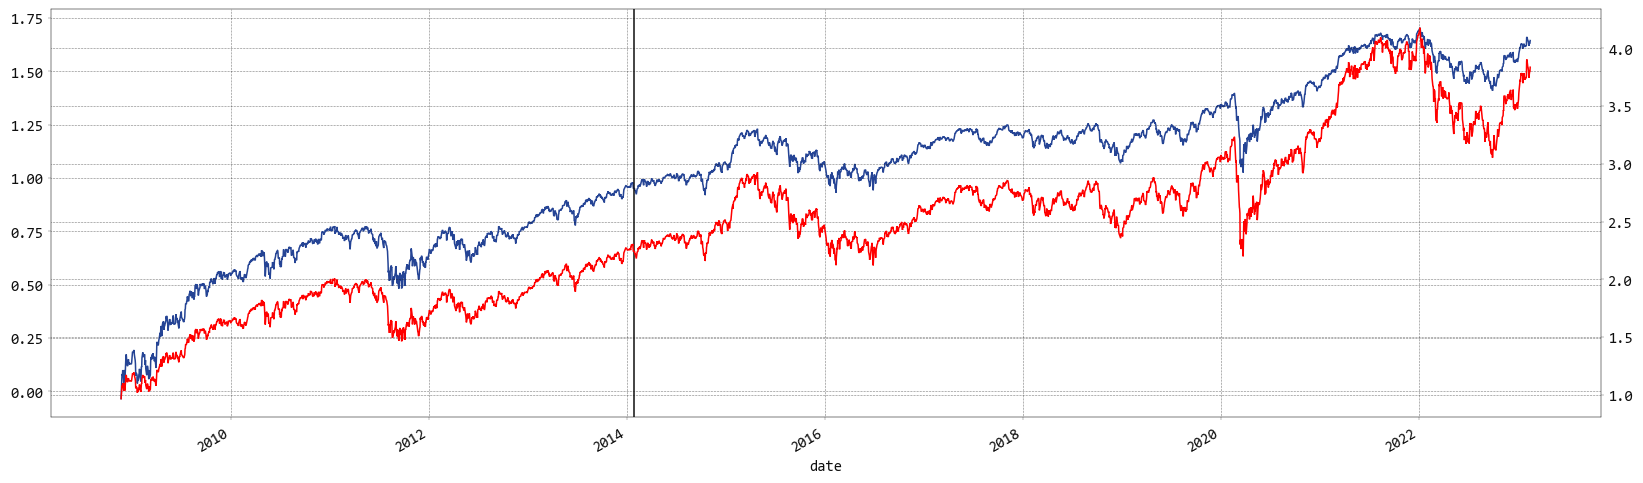

In [14]:
f, ax = plt.subplots(figsize=(20, 6))
ax2 = ax.twinx()
df['price_pct_add'].plot(ax=ax)
df['price_pct_mul'].plot(ax=ax2, c='r')
ax.axvline(halfway_row.index)
df

In [13]:
ticks = ['^OMX','EVO.ST', 'CALTX.ST', 'SINCH.ST', 'EMBRAC-B.ST', 'SBB-B.ST', 'INVE-B.ST',
         'CAST.ST', 'KAMBI.ST', 'CTM.ST', 'HM-B.ST', 'EQT.ST', 'KIND-SDB.ST',
         'NDA-SE.ST','TELIA.ST','ELUX-B.ST','SKA-B.ST','SSAB-B.ST', 'HEXA-B.ST', 
         'SAND.ST', 'ASSA-B.ST', 'ABCL', 'NEON', 'META', 'GOOG', 'SPOT', 'AAPL', 'MSFT','TSLA','NFLX']

#ticks_commodities = ['GC=F', 'SI=F']

ticks_index = ['^OMX', '^GSPC', '^IXIC', '^DJI', '^TYX', '^GDAXI']

ticks = ticks_index

In [20]:

df_ticks = {}
for tick in ticks:
    #df = get_tick(tick = tick, interval=1)
    df = openbb.stocks.load(tick, start_date='2022-01-01', end_date='2024-01-01', interval=1)
    df_ticks[tick] = df


Loading Intraday 1min data for ^OMX with starting period 2023-02-16.

Loading Intraday 1min data for ^GSPC with starting period 2023-02-16.

Loading Intraday 1min data for ^IXIC with starting period 2023-02-16.

Loading Intraday 1min data for ^DJI with starting period 2023-02-16.

Loading Intraday 1min data for ^TYX with starting period 2023-02-16.

Loading Intraday 1min data for ^GDAXI with starting period 2023-02-16.

## Fractal Markets

^OMX


Loading Intraday 1min data for ^OMX with starting period 2023-03-09.

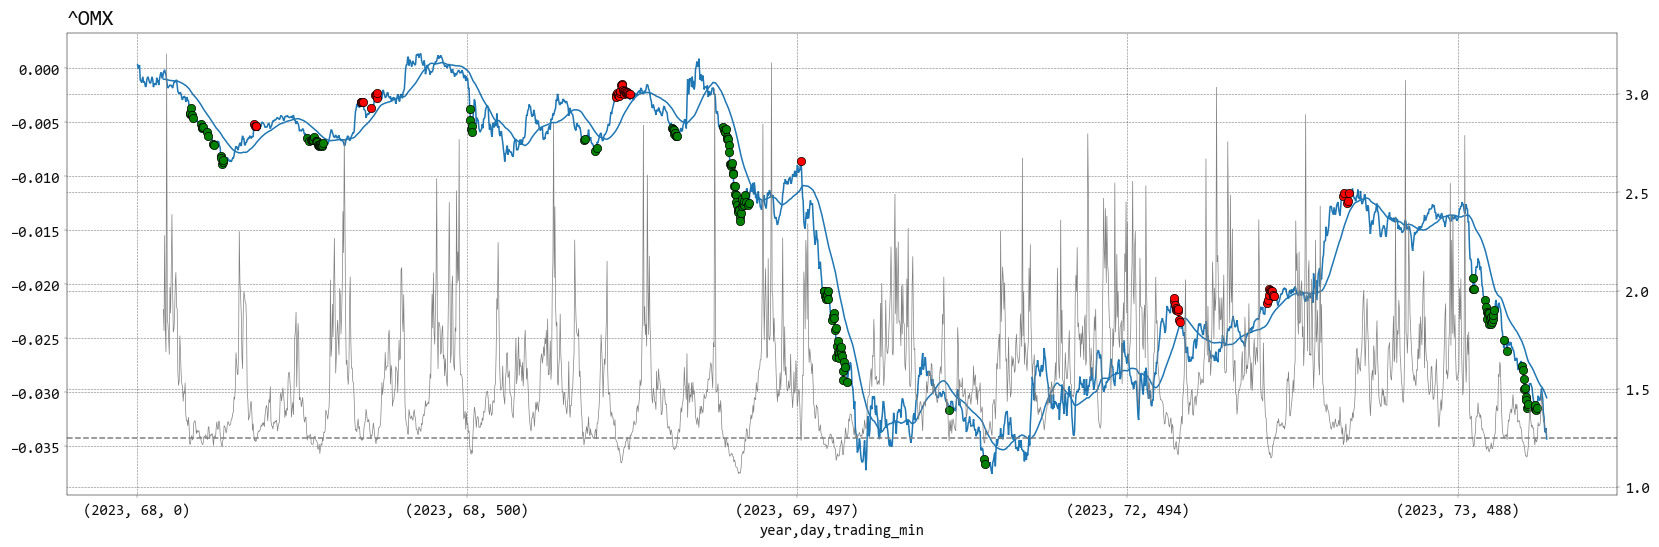

In [5]:


for count, tick in enumerate(['^OMX']):
    interval = 1
    window = 40
    
    print(tick)
    df = openbb.stocks.load(tick, start_date='2023-03-01', end_date='2024-01-01', interval=interval)
    #df = df_ticks[tick].copy()
    #df = df_gold
    #df = openbb.stocks.load(tick, start_date='2022-01-01', end_date='2024-01-01', interval=1)
    
    df['open_close'] = df['Close'].div(df['Open']).sub(1).cumsum()
    df['close_open'] = df['Open'].div(df['Close'].shift(1)).sub(1).cumprod()
    df['close_close'] = df['Close'].div(df['Close'].shift(1)).cumprod()
    df['vol_ma20'] = df['Volume'].div(df['Volume'].rolling(12, min_periods=10).mean())
    df['price_adjusted'] = adjust_closed_gap(df.copy())
    
    df['pct_add'] = df['price_adjusted'].pct_change().cumsum()
    df['pct_mul'] = df['price_adjusted'].pct_change().add(1).cumprod()
    
    measure = 'pct_add'
    df[measure+'_rol'] = df[measure].rolling(window).mean()
    
    df['frac_add'] = hurst_it(df['price_adjusted'], n=window)
    df['day'] = df.index.dayofyear
    df['year'] = df.index.year
    df['trading_day'] = df.groupby(['year']).cumcount()
    #df = df[df.index > '2015']
    df['trading_min'] = df.groupby(['year', 'day']).cumcount()
    
    intraday = True
    if intraday:
        #df = df.reset_index().reset_index()
        df = df.reset_index().set_index(['year','day', 'trading_min'])
    #df.index = df.index.astype(str)
    #
    
    f, ax = plt.subplots(1, 1, figsize=(20, 6))
    ax2 = ax.twinx()
    df[measure].plot(title = tick, ax=ax, color='tab:blue')
    df[measure].rolling(window).mean().plot(title = tick, ax=ax, color='tab:blue')
    #df['pct_mul'].plot(title = tick, ax=ax2, color='tab:green')
    df['buy'] = df.loc[(df['frac_add']<1.25)
                       & (df[measure] < df[measure+'_rol'])
                       ][measure]
    df['sell'] = df.loc[(df['frac_add']<1.25)
                       & (df[measure] > df[measure+'_rol'])
                       ][measure]
    df['buy'].plot(ax=ax, ls='', marker='o', color='green', ms=6, mec='black')
    df['sell'].plot(ax=ax, ls='', marker='o', color='red', ms=6, mec='black')

    #df['collapse_mul'].plot(ax=ax2, ls='', marker='o', color='red', ms=6, mec='black')

    df['frac_add'].plot(ax = ax2, color='grey', lw=0.5, alpha = 1, ls='-')
    ax2.axhline(1.25, color= 'grey', ls='--')
    #df[df['frac_add']<1.25]['frac_add'].plot(ax = ax2, color='grey', lw=1, alpha = 1, ls='', marker='o', ms=4)
    #df['Volume'].rolling(60).mean().plot(ax=ax2, alpha = 0.5)
    
    #tickmark = [(2023, 0),(2020,0),(2021, 0),(2022, 0), (2023,0)]
    #tickers = df.loc[tickmark]['index']
    #ax.set_xticks(tickers)
    #ax.set_xticklabels(tickmark)
#ax.legend(tick40

In [138]:
df['frac_add'].

year  day  trading_min
2023  38   0                   NaN
           1                   NaN
           2                   NaN
           3                   NaN
           4                   NaN
                            ...   
      39   294            1.577406
           295            1.498902
           296            1.425530
           297            1.382686
           298            1.373458
Name: frac_add, Length: 806, dtype: float64

<AxesSubplot: >

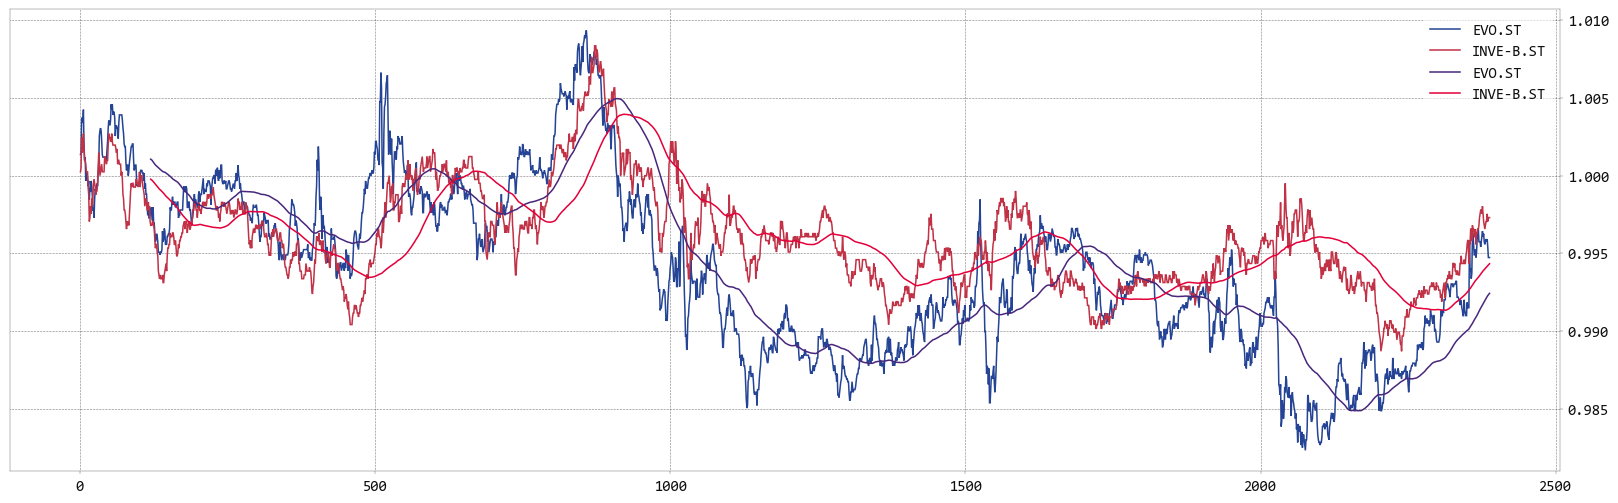

In [60]:
f, ax = plt.subplots(figsize=(20, 6))
tick = ['EVO.ST', 'INVE-B.ST']
df1 = adjust_closed_gap(df_ticks[tick[0]]).rename(tick[0])
df2 = adjust_closed_gap(df_ticks[tick[1]]).rename(tick[1])
df = pd.concat([df1, df2], axis=1)
df = df.reset_index(drop=True).pct_change().add(1).cumprod()
df.plot(ax=ax)
df.rolling(120).mean().plot(ax=ax)
#df[tick[0]].sub(df[tick[1]]).plot(ax=ax)
#ax.axhline(0)
#ax.legend([ticks[0], ticks[1]])

## Open-Close (Market Open) 
## VS 
## Close-Open (Market Closed)

C:\Users\ohjartarson\AppData\Local\Temp\ipykernel_23516\2776517118.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(figsize=(20, 6))


error


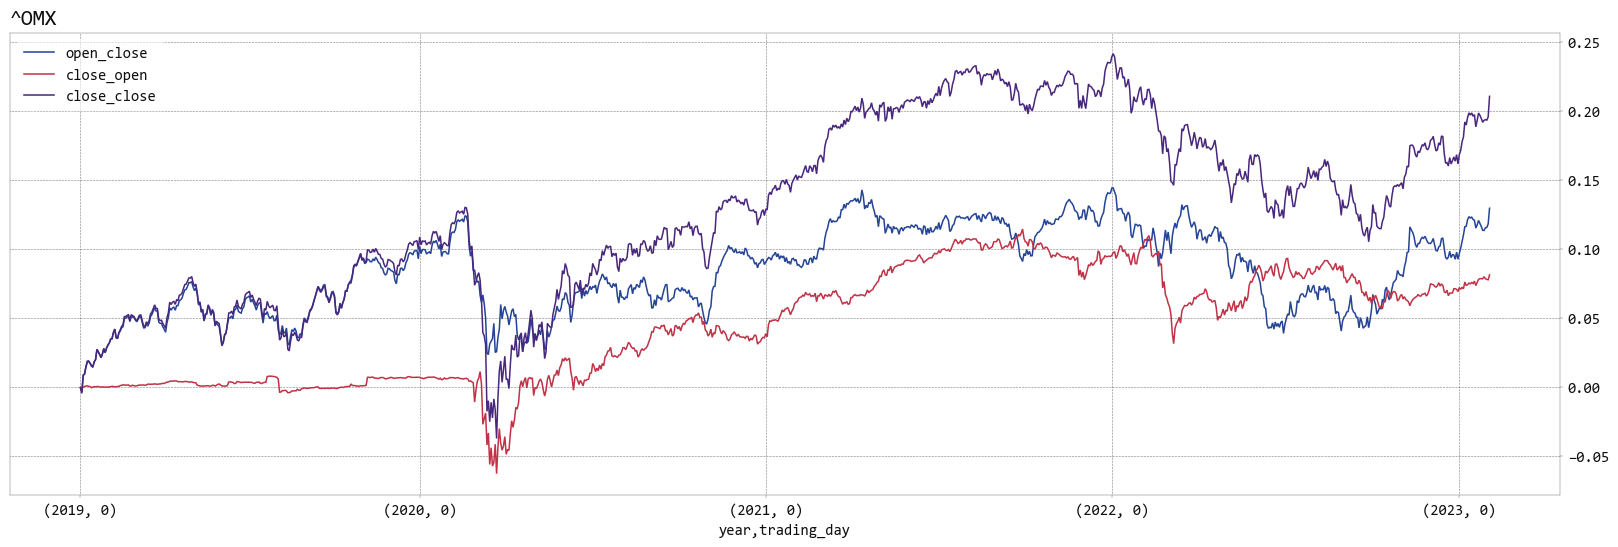

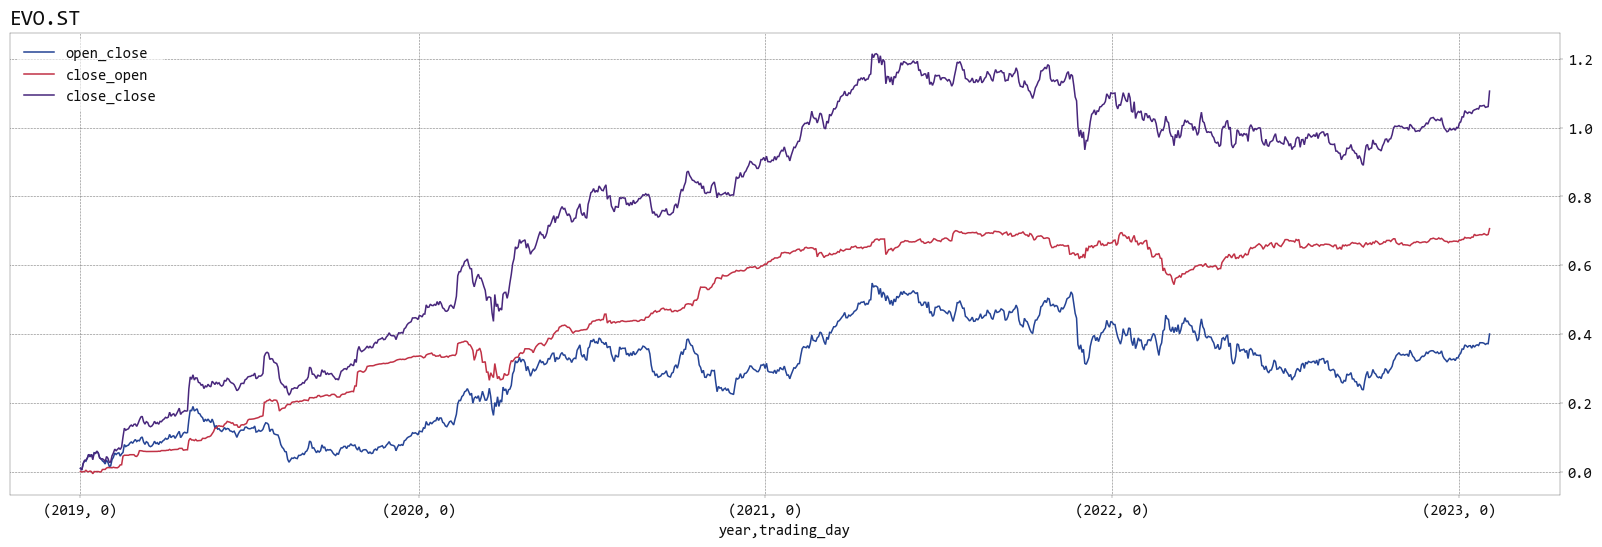

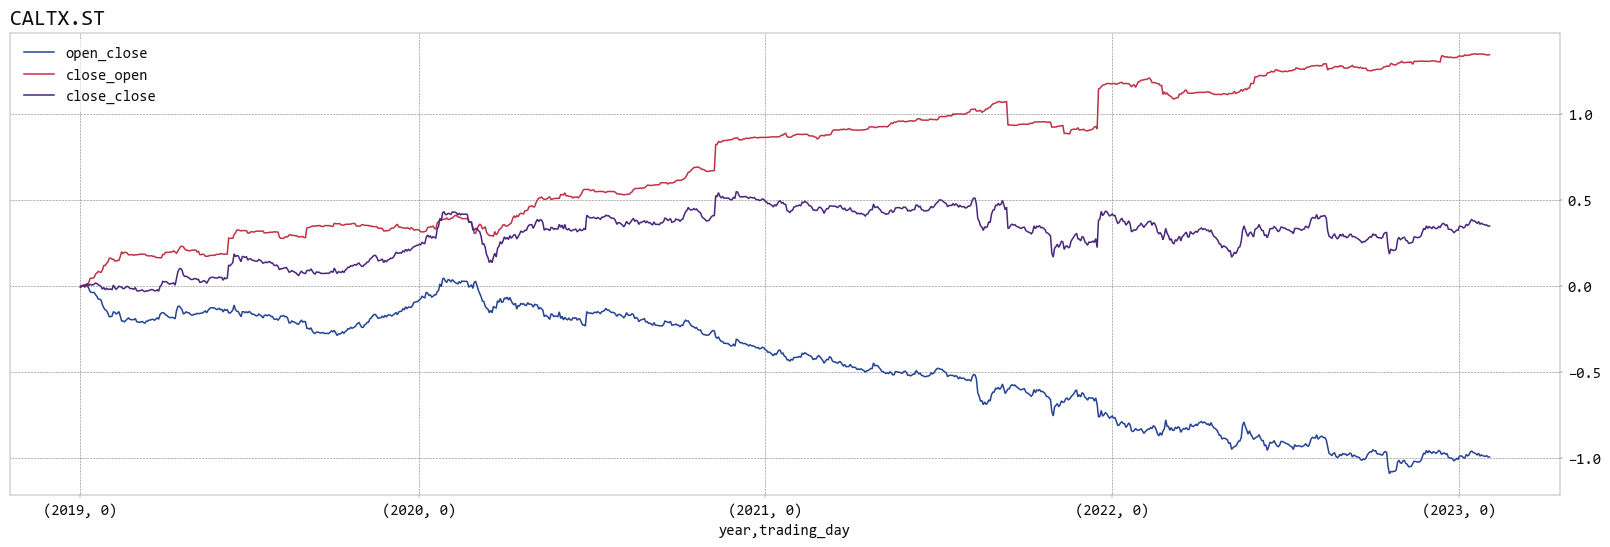

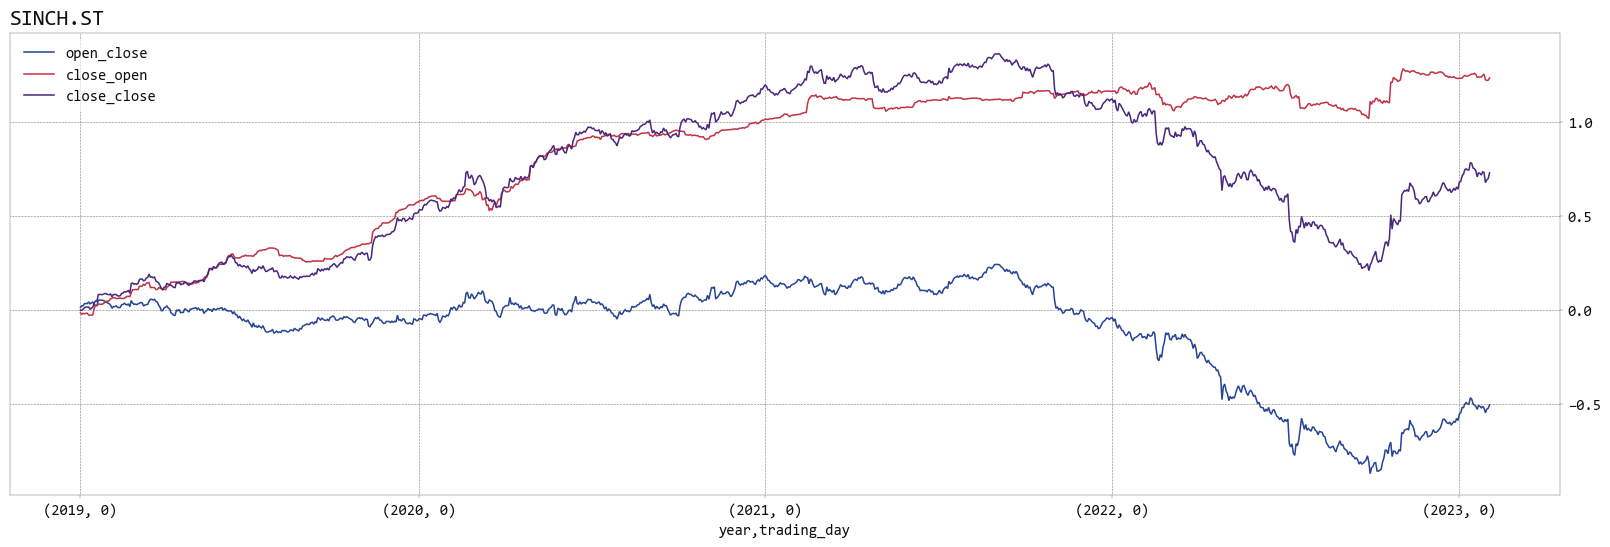

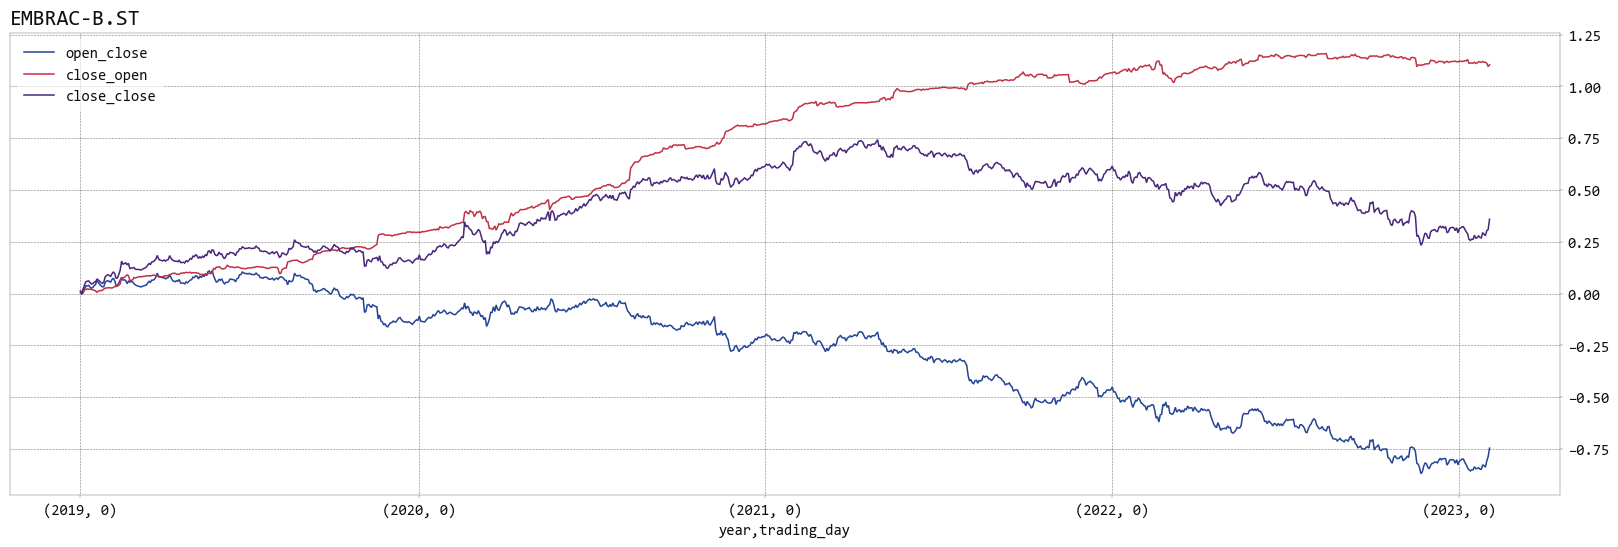

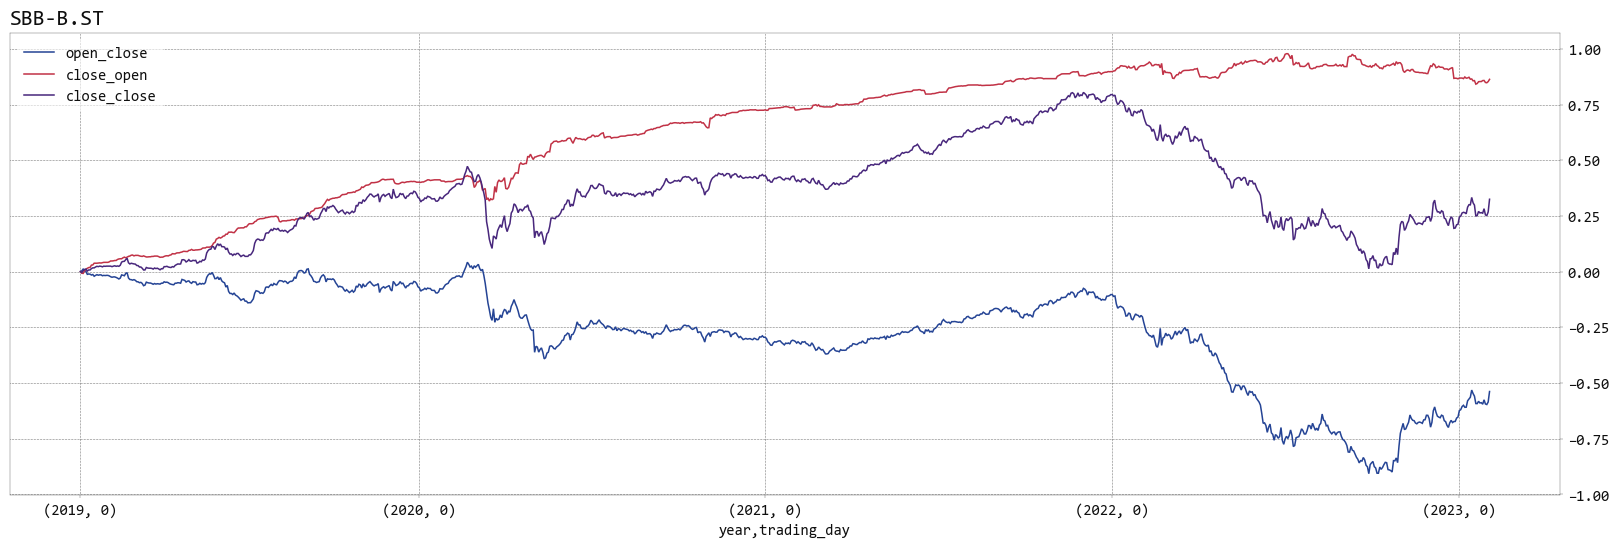

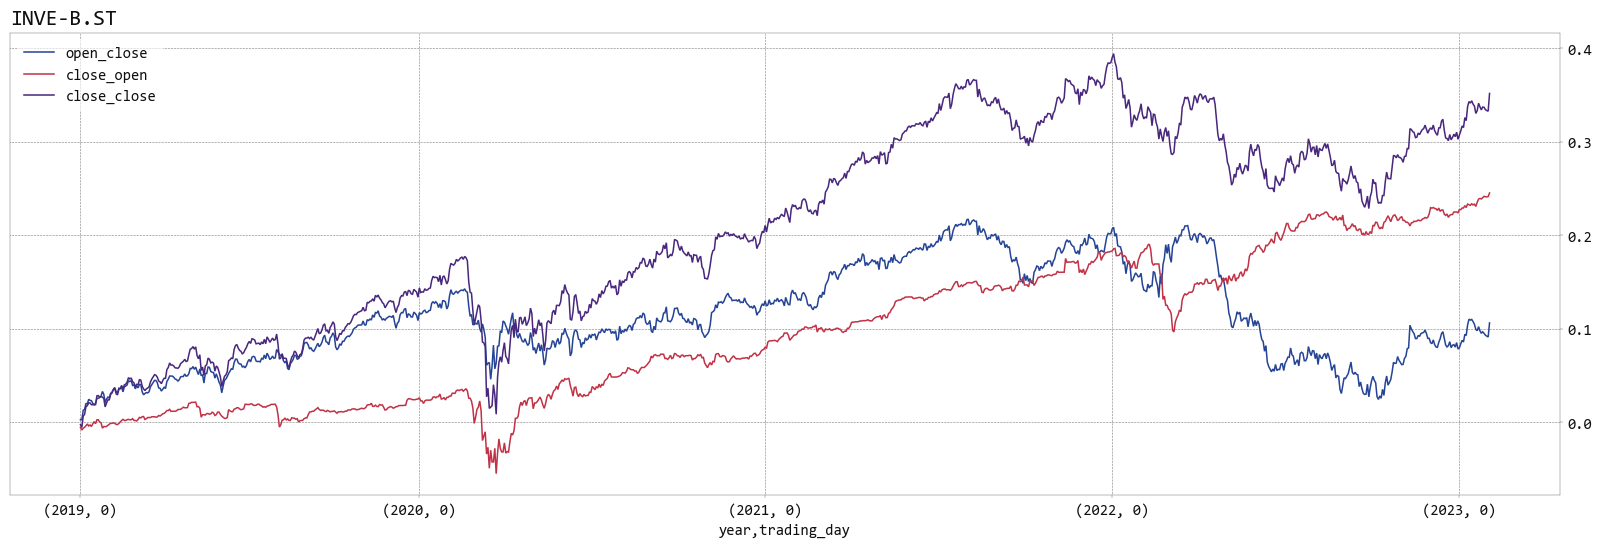

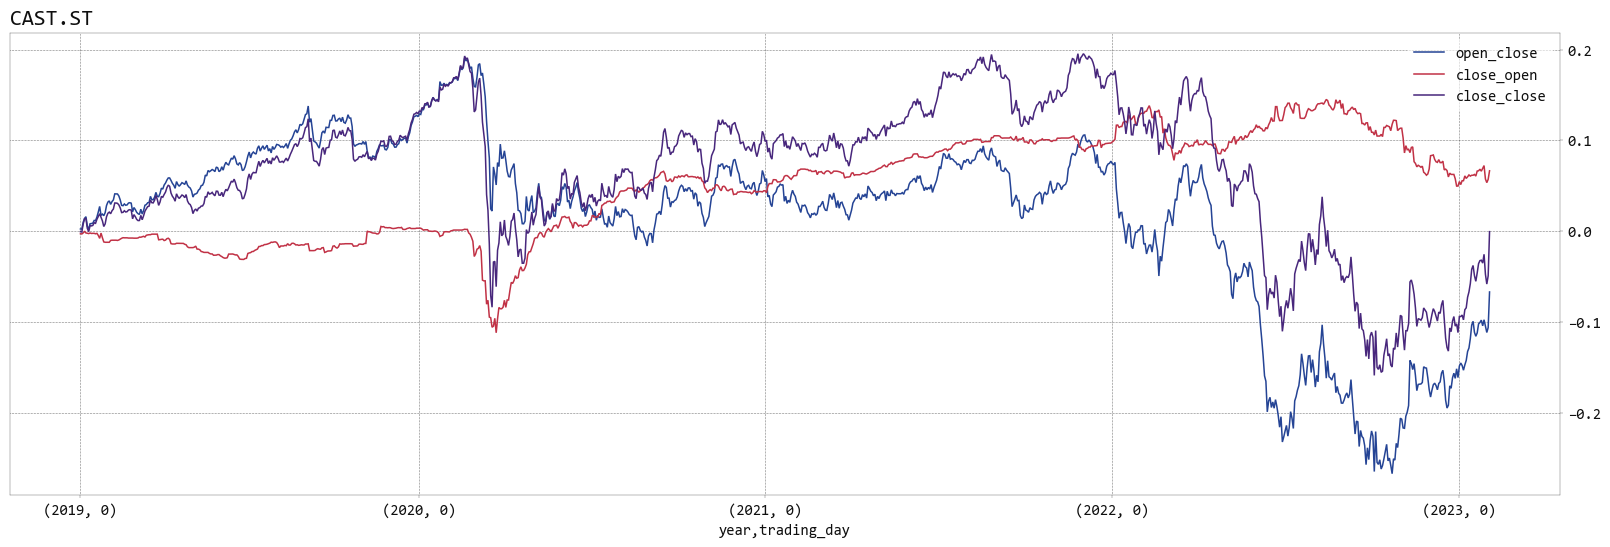

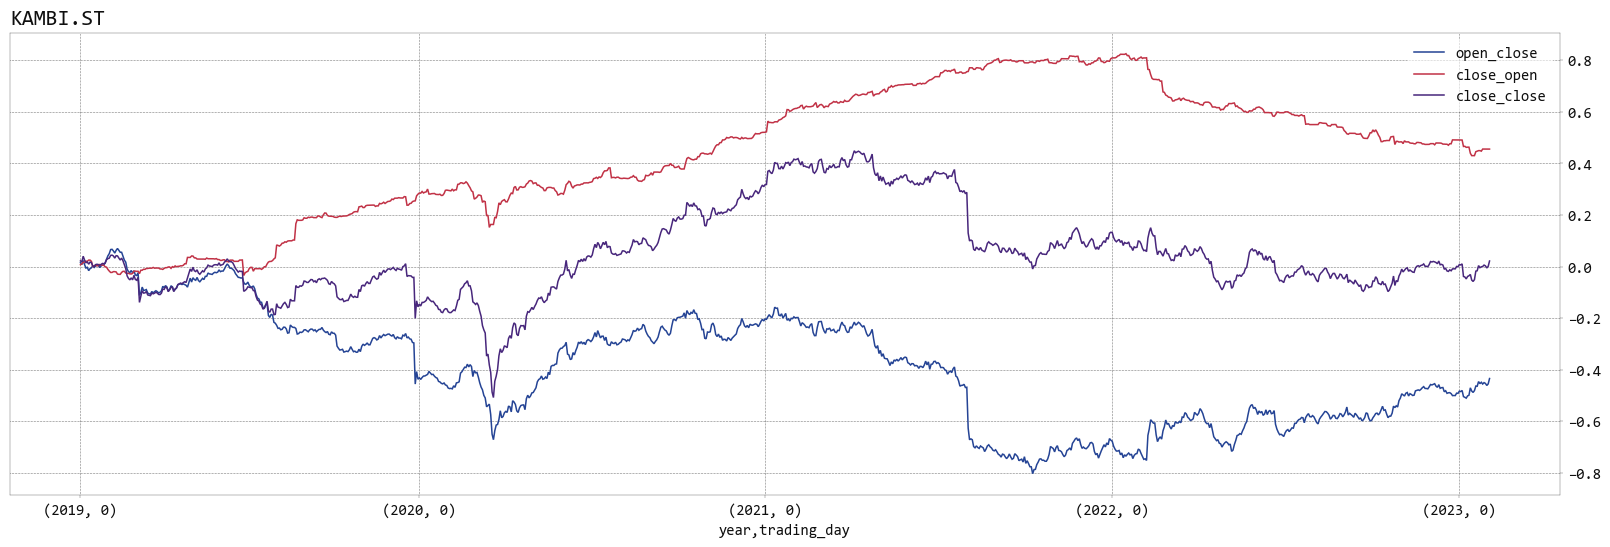

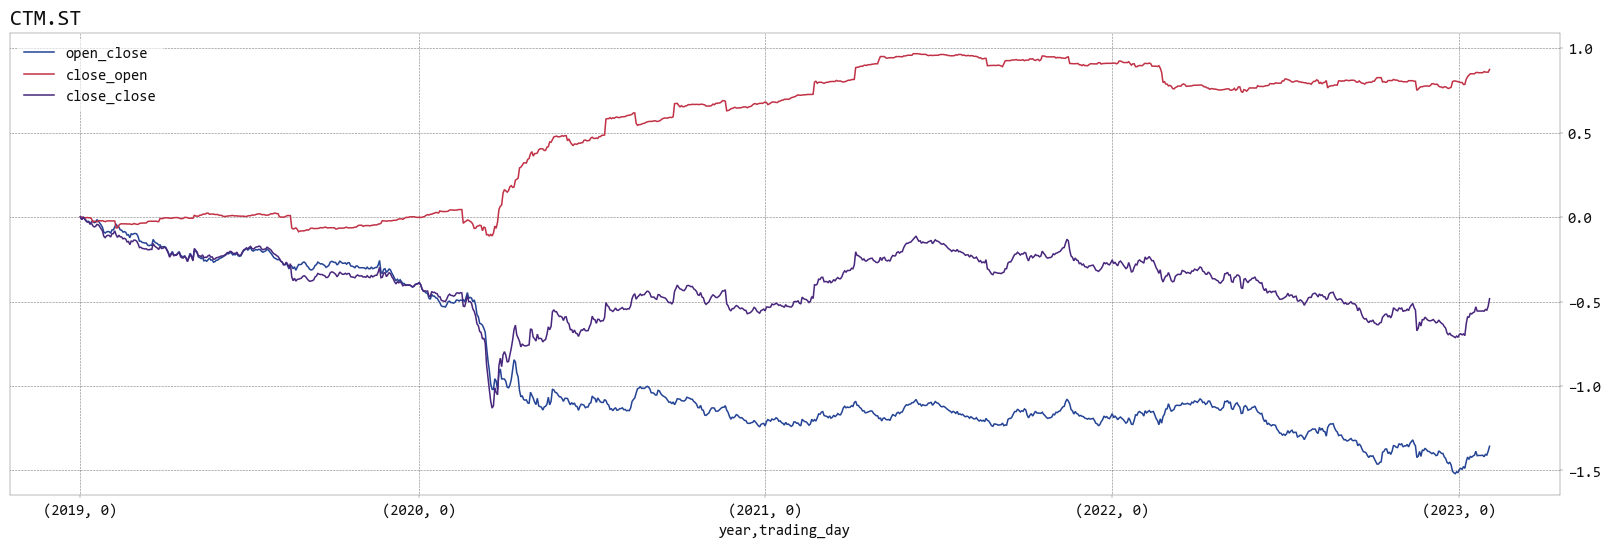

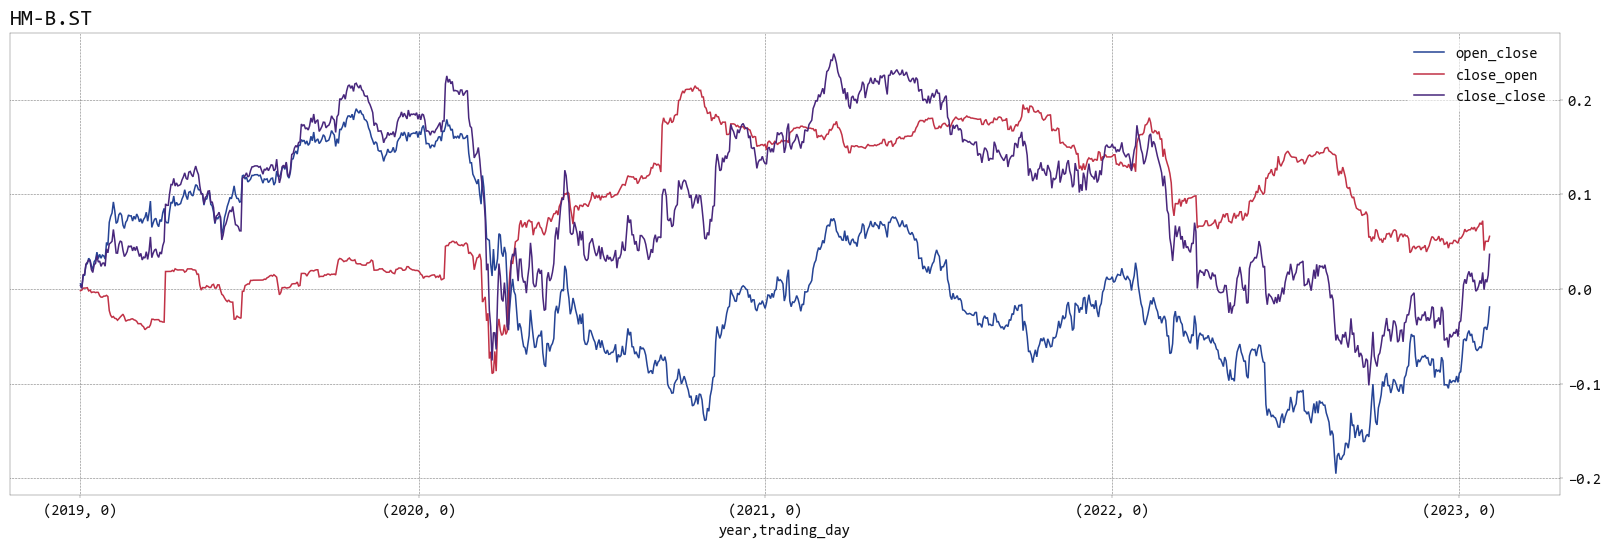

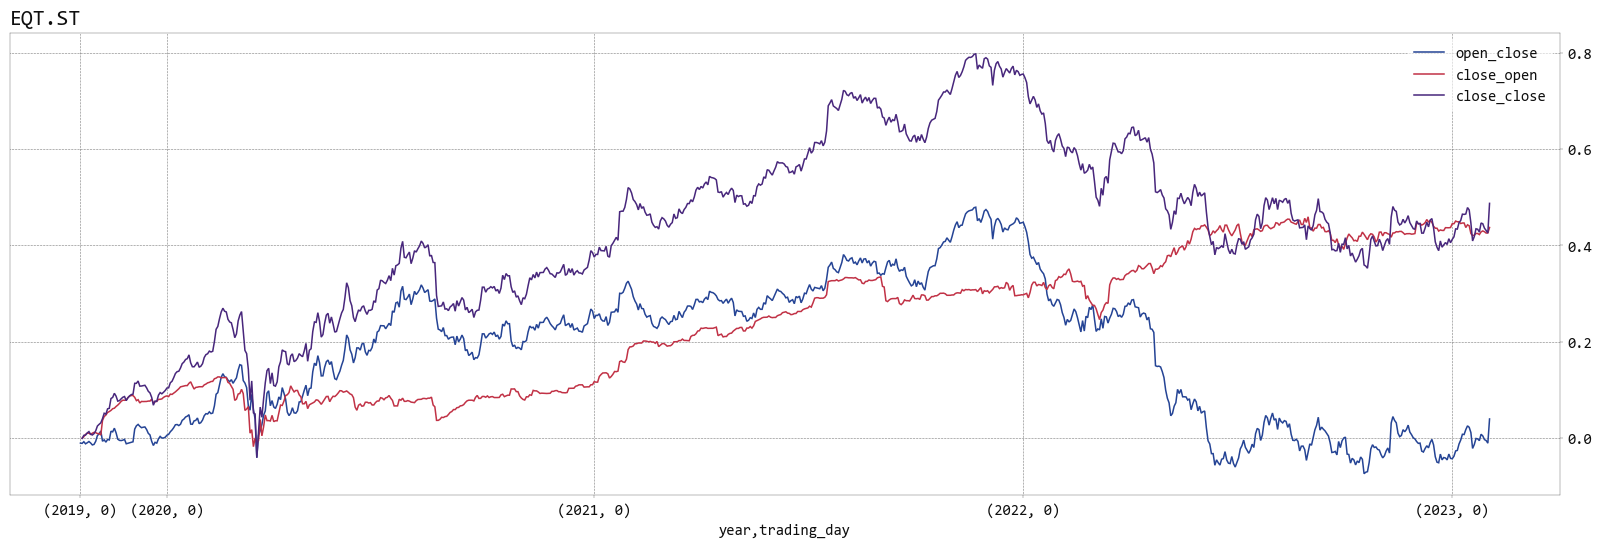

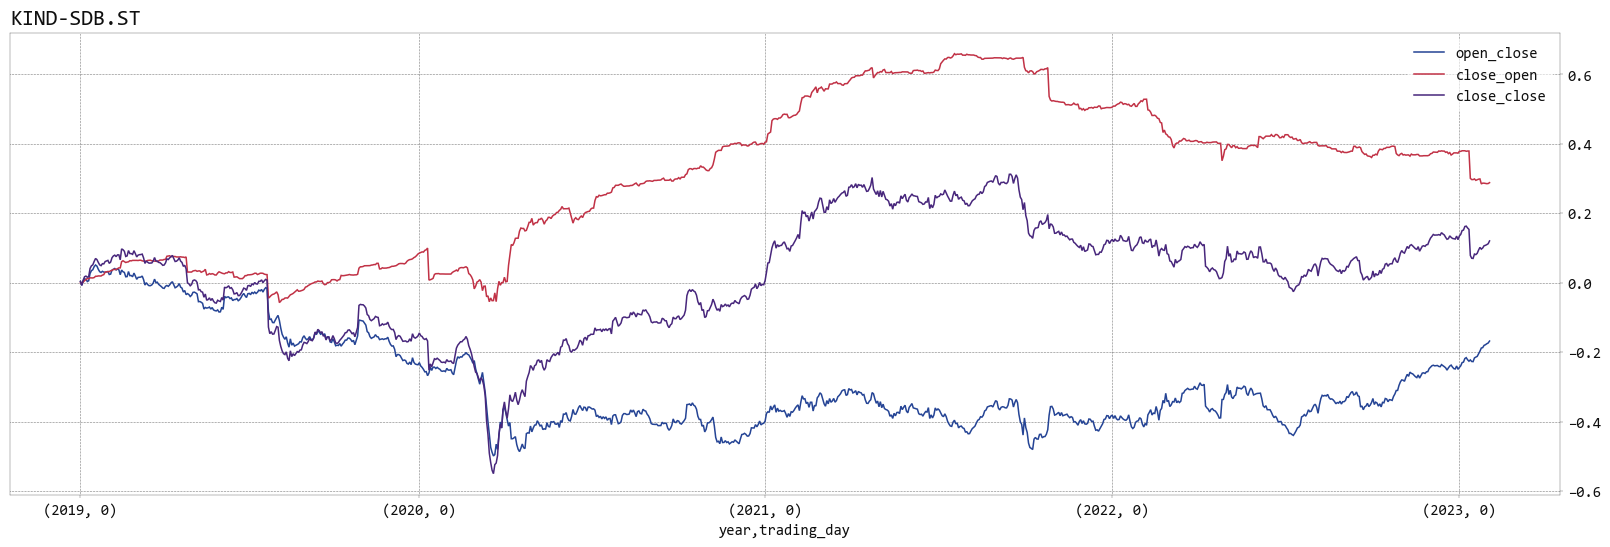

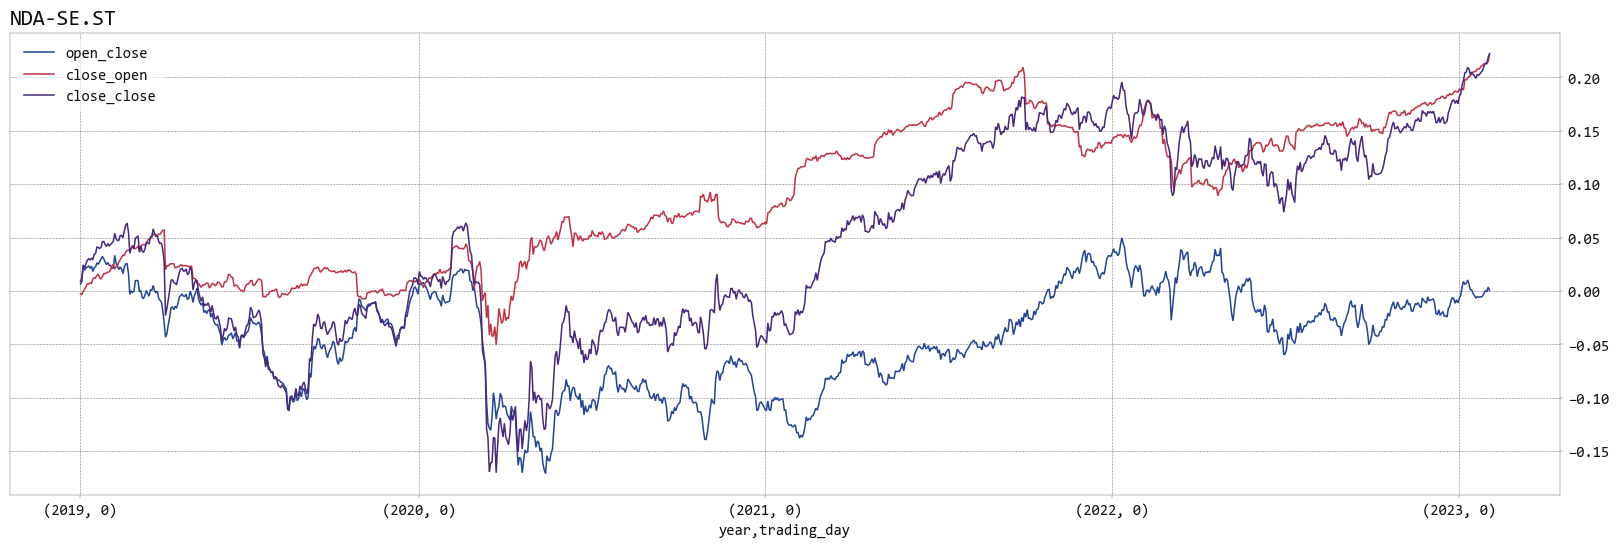

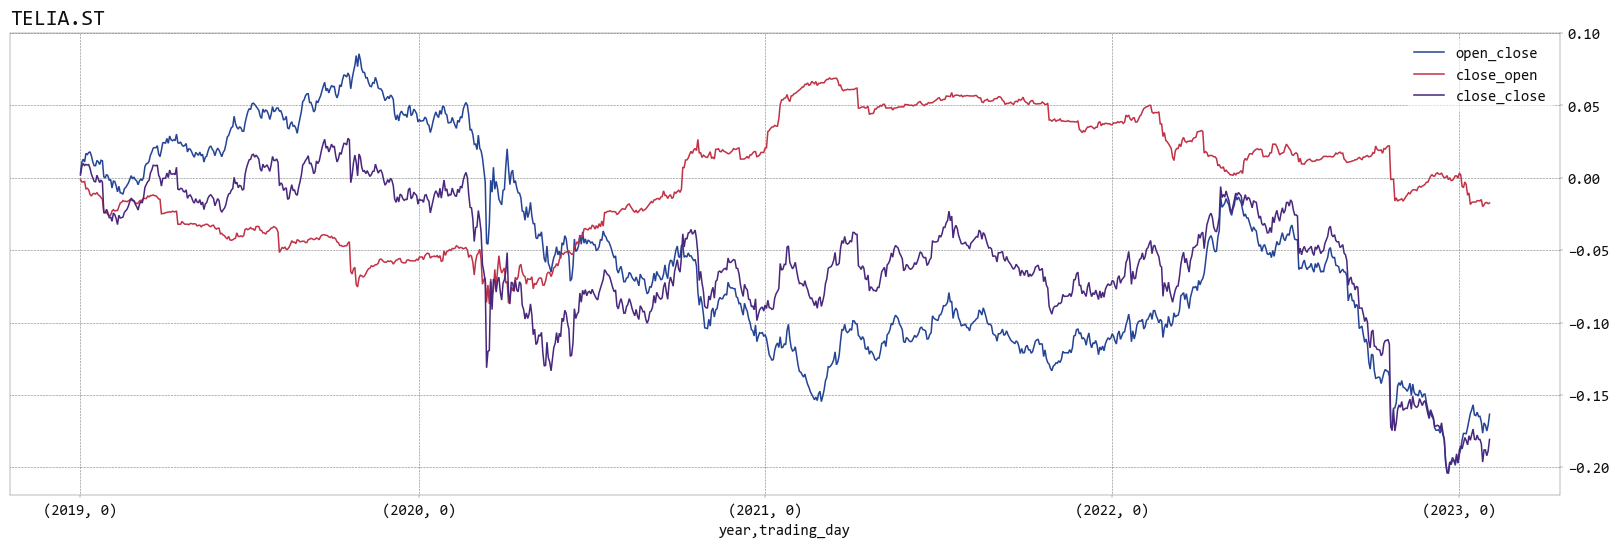

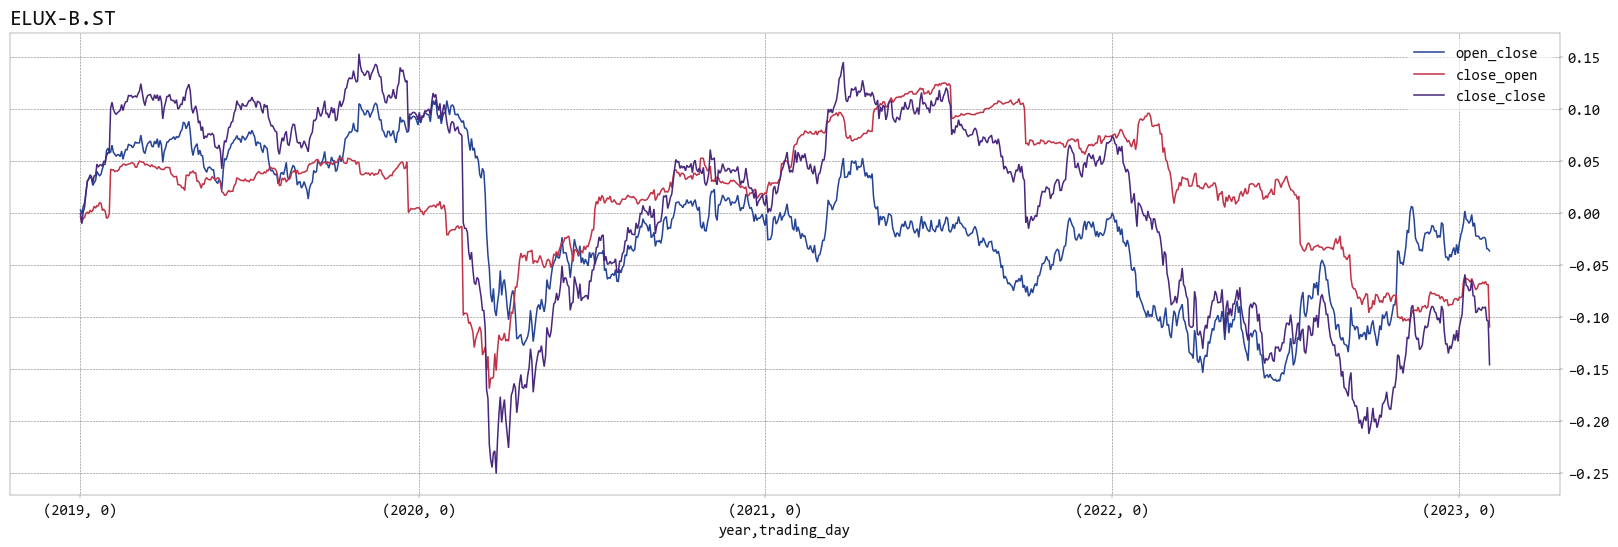

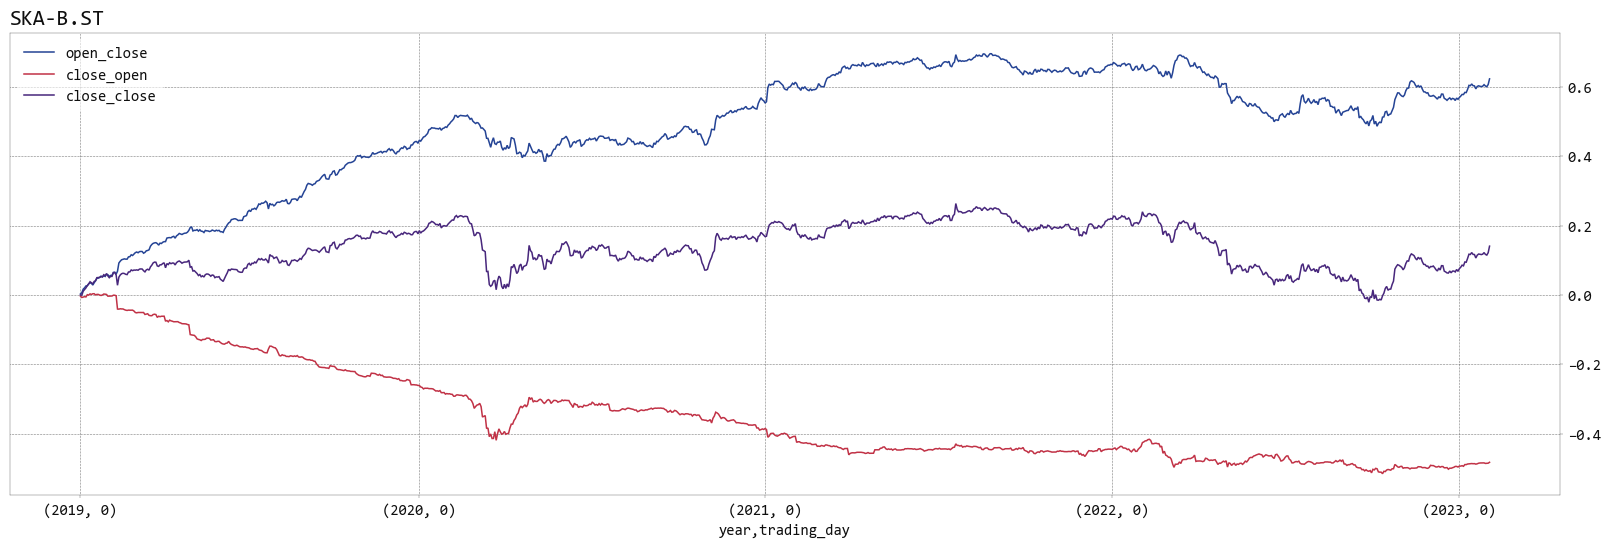

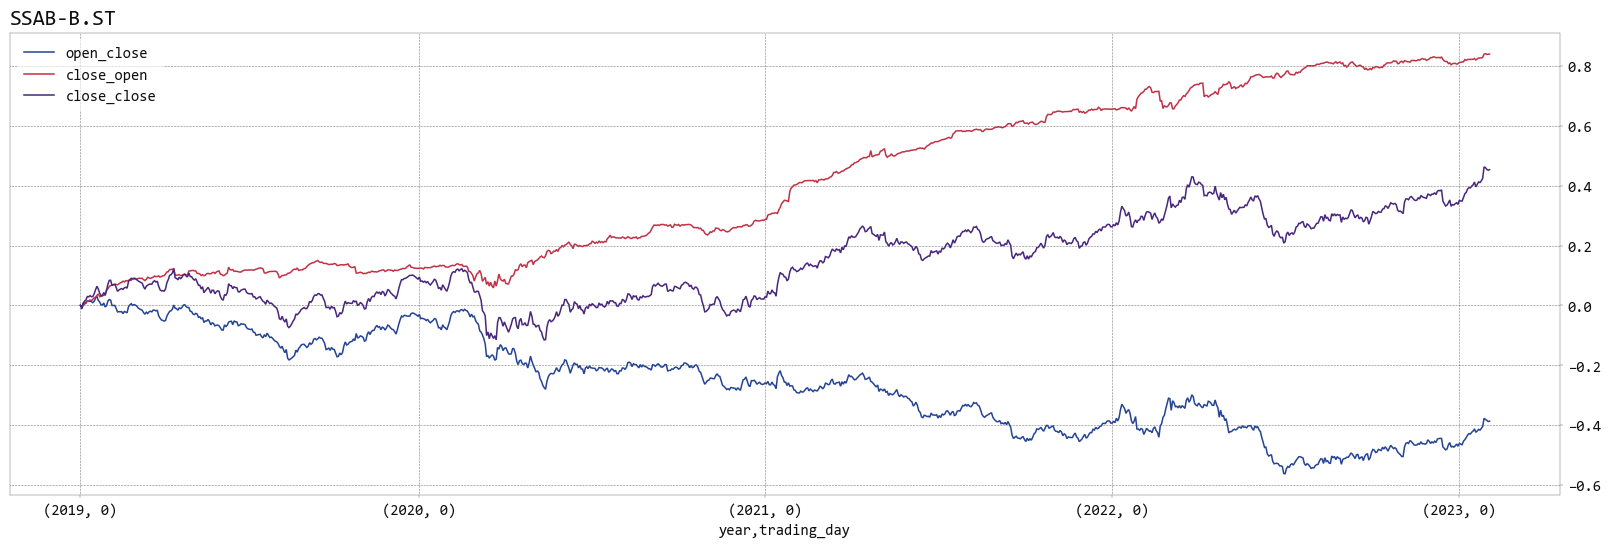

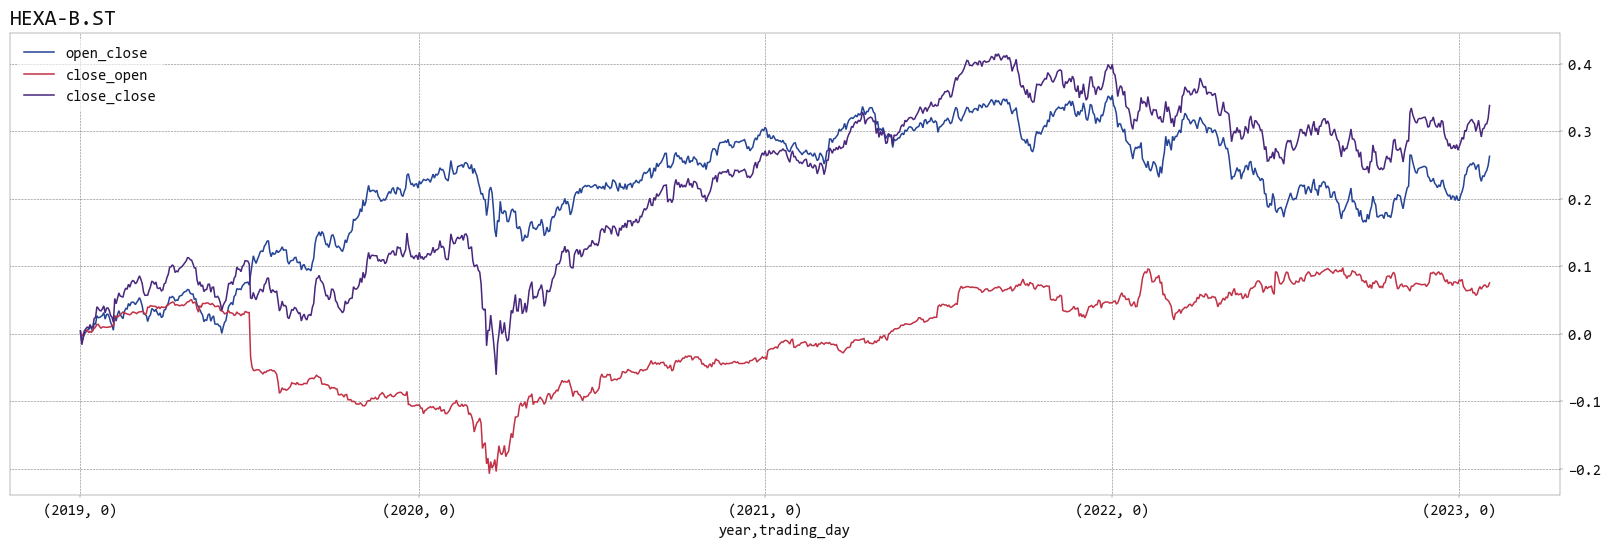

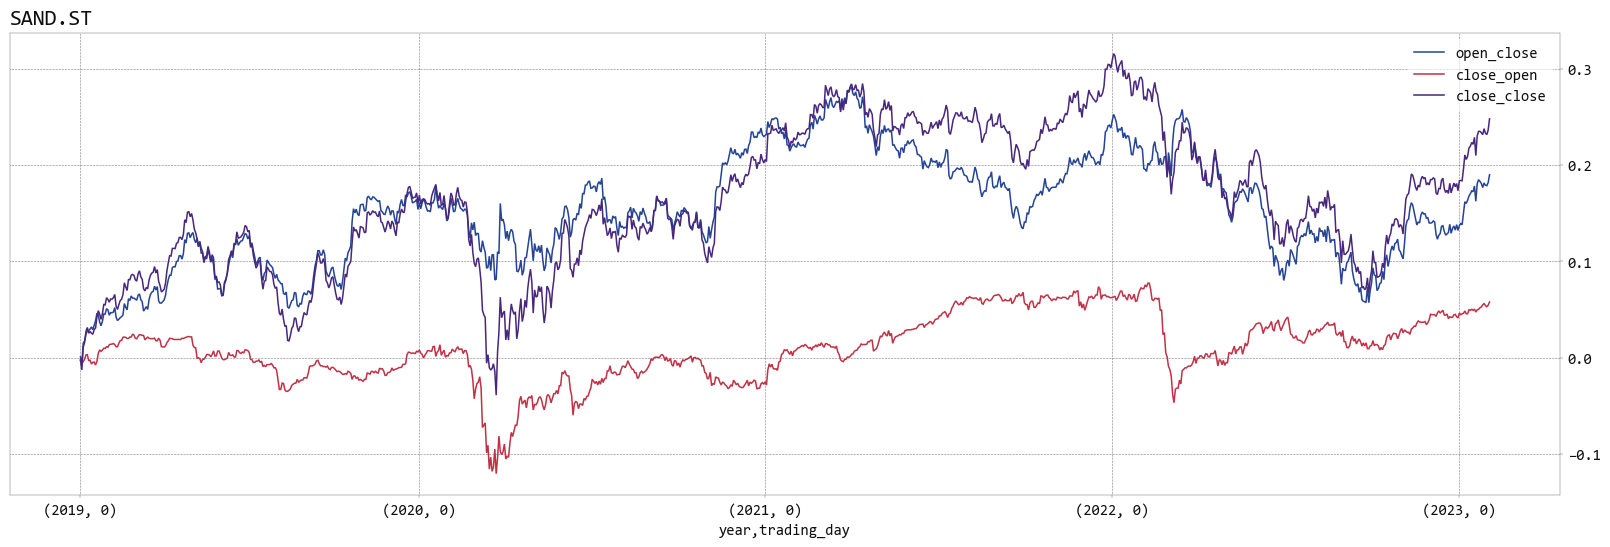

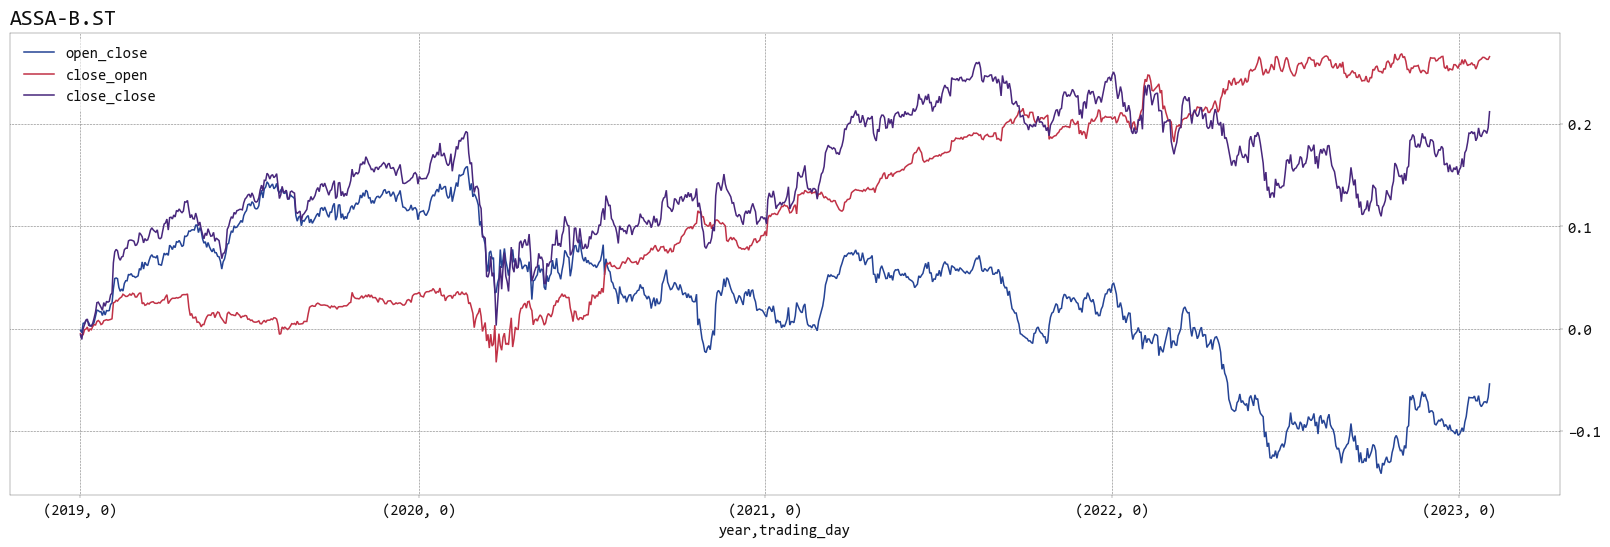

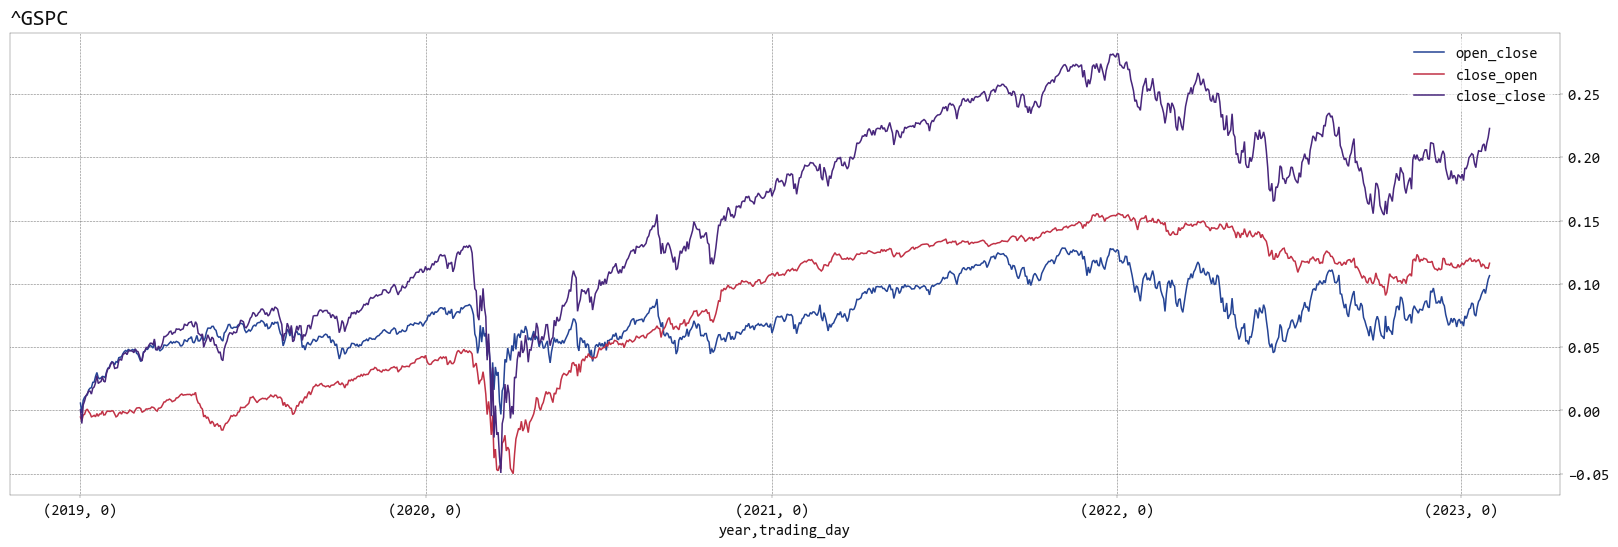

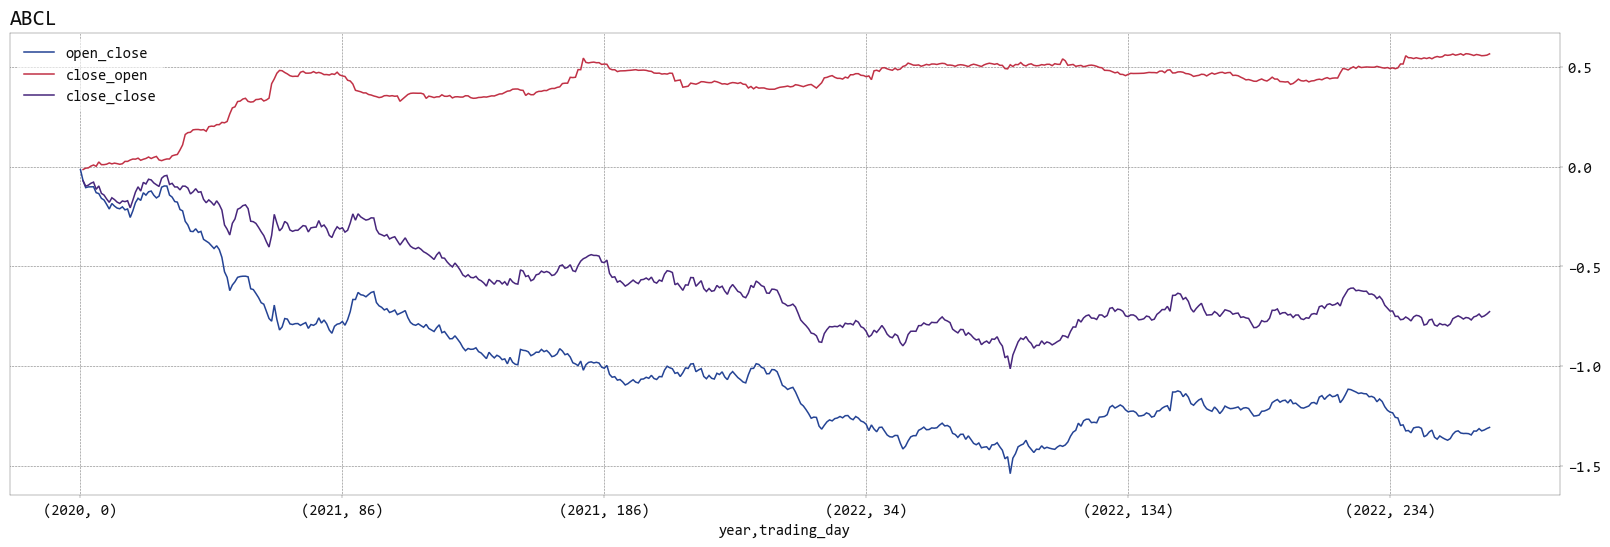

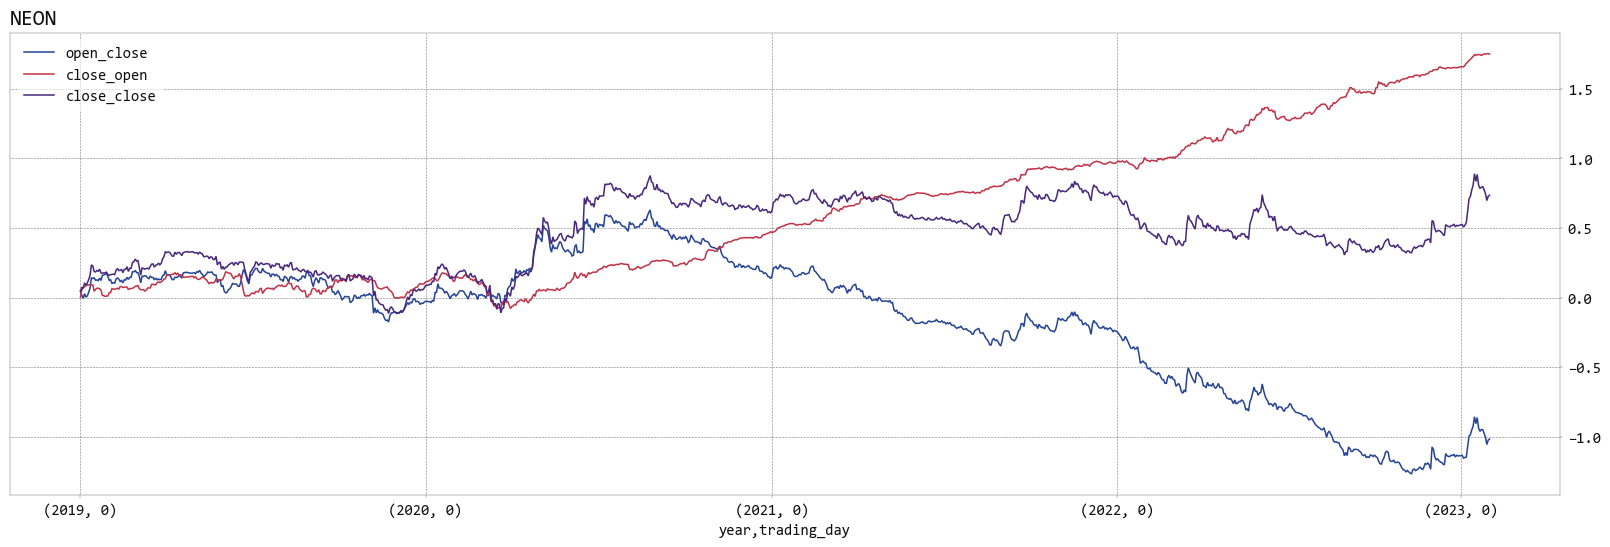

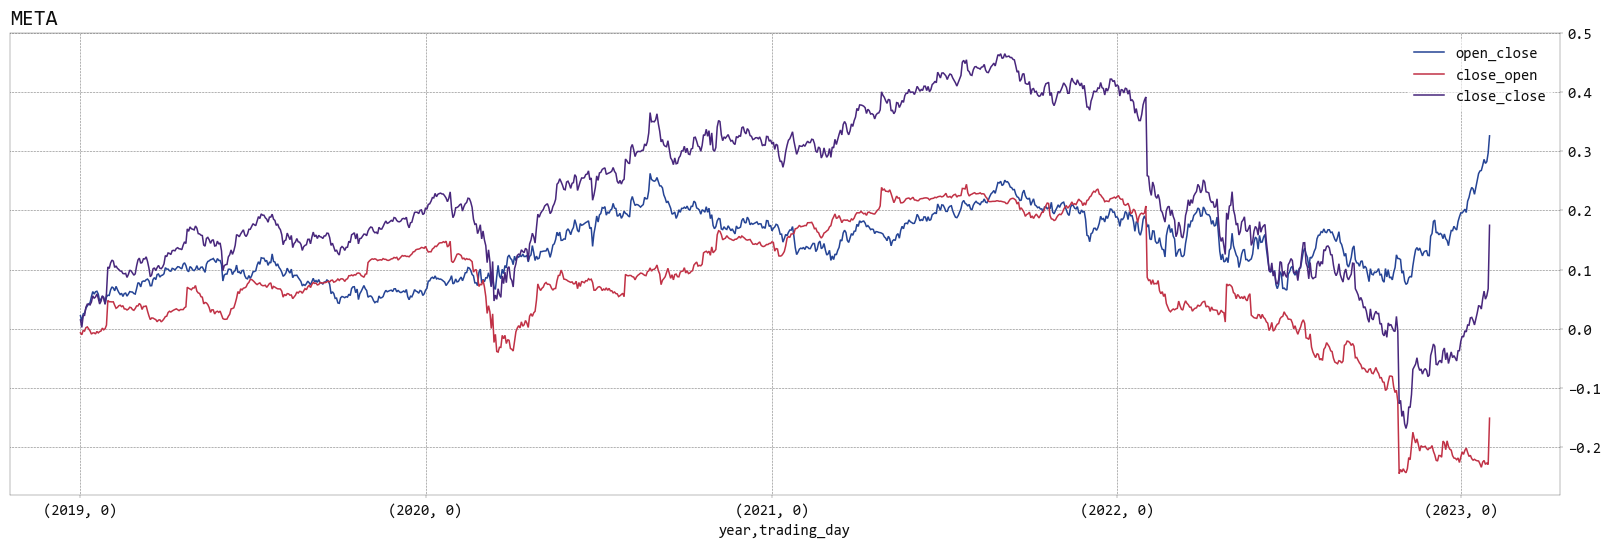

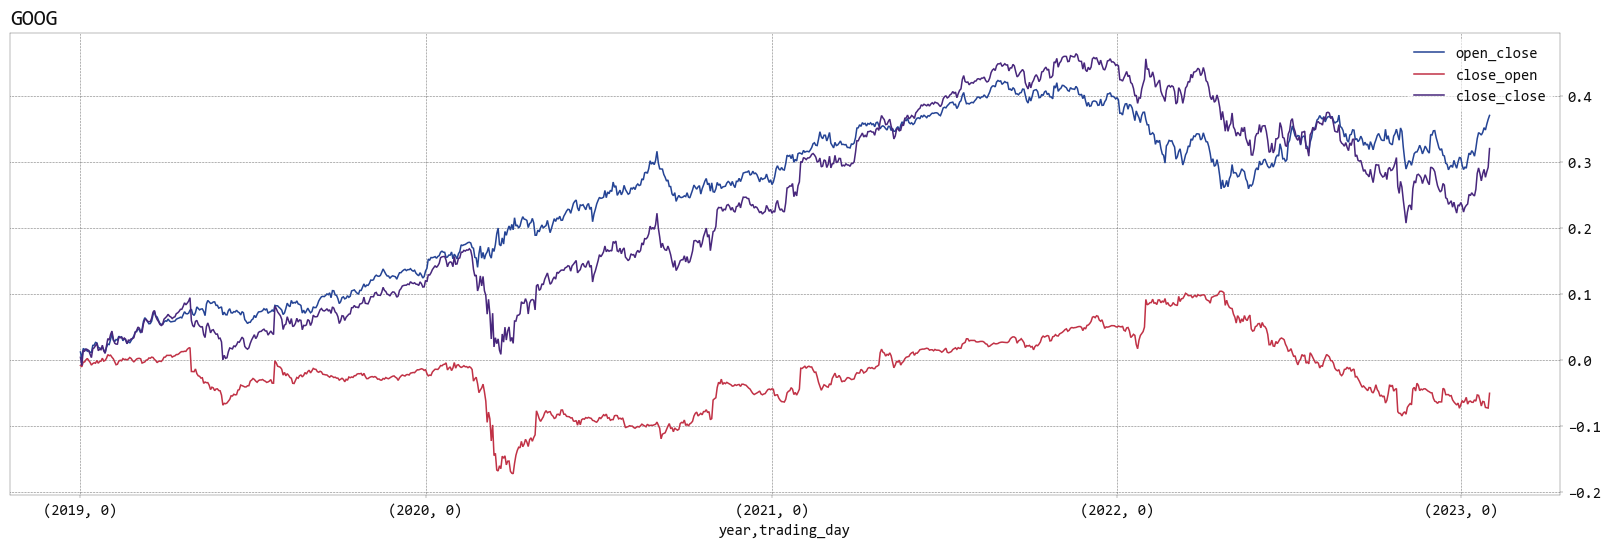

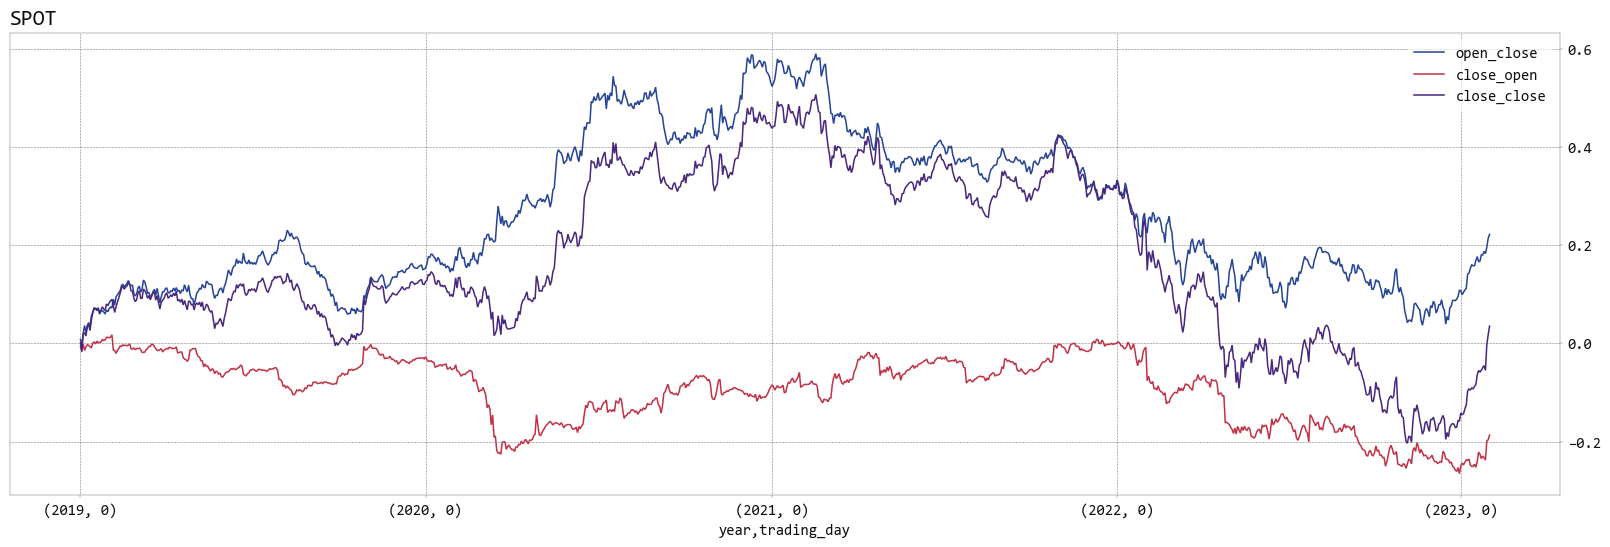

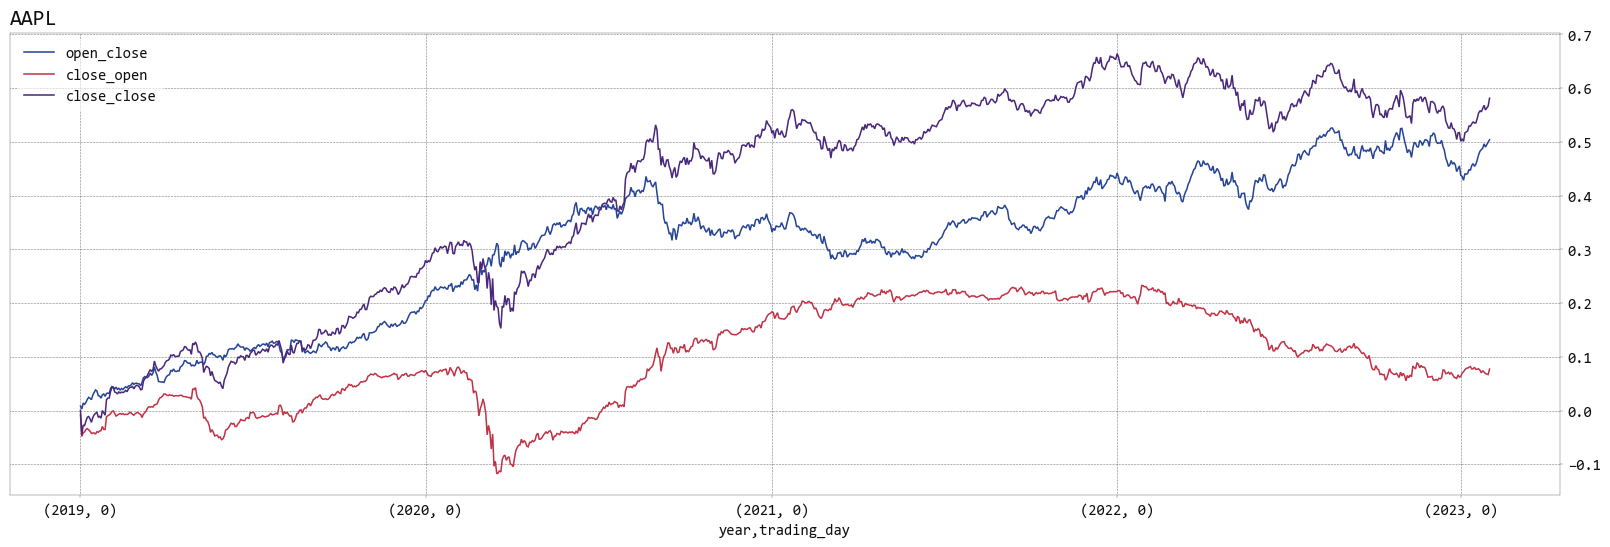

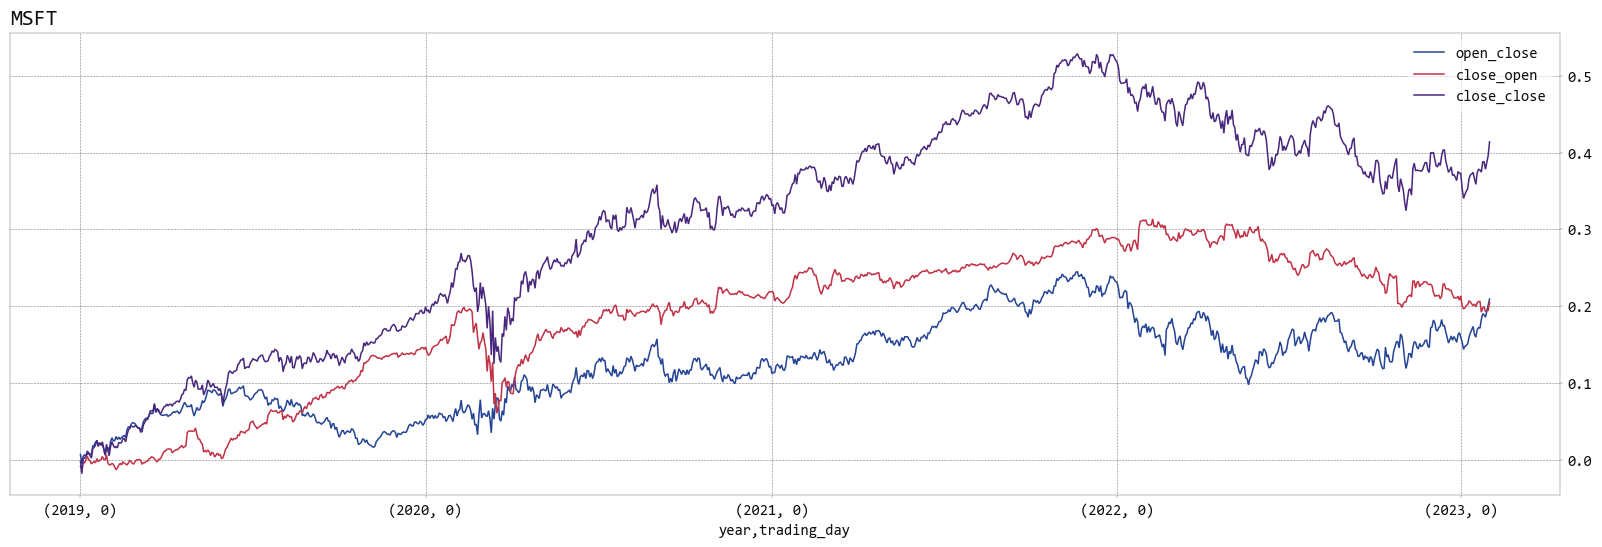

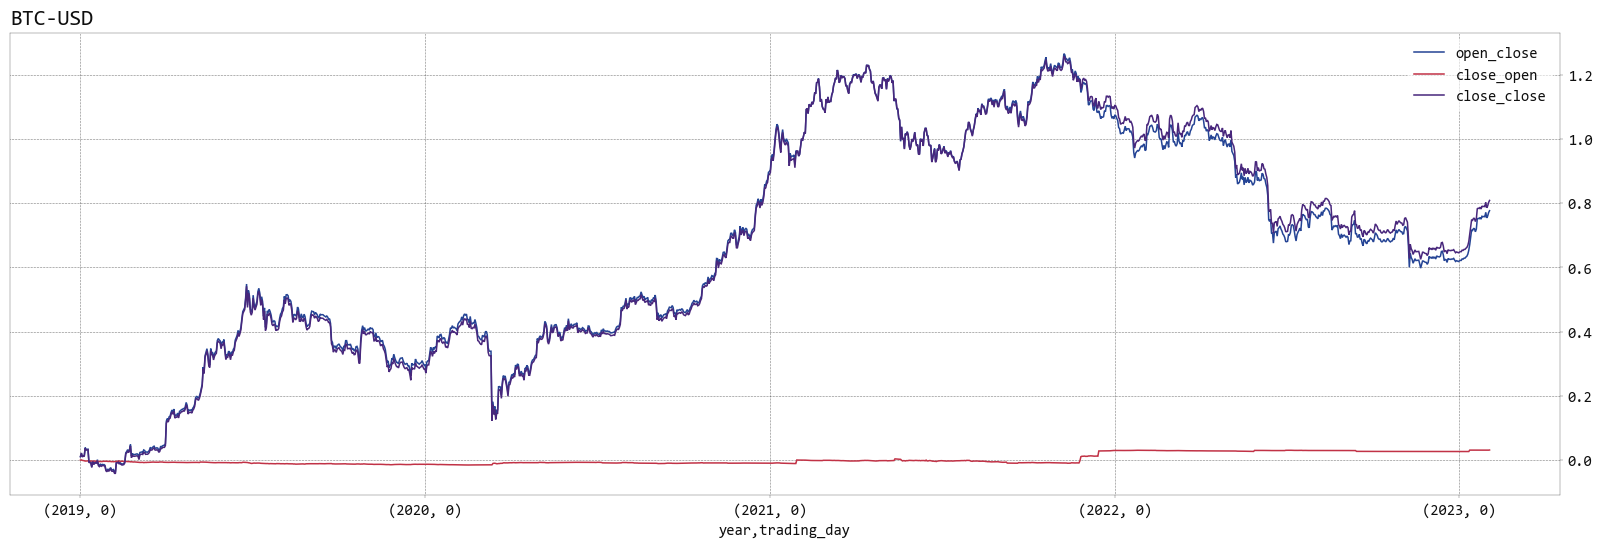

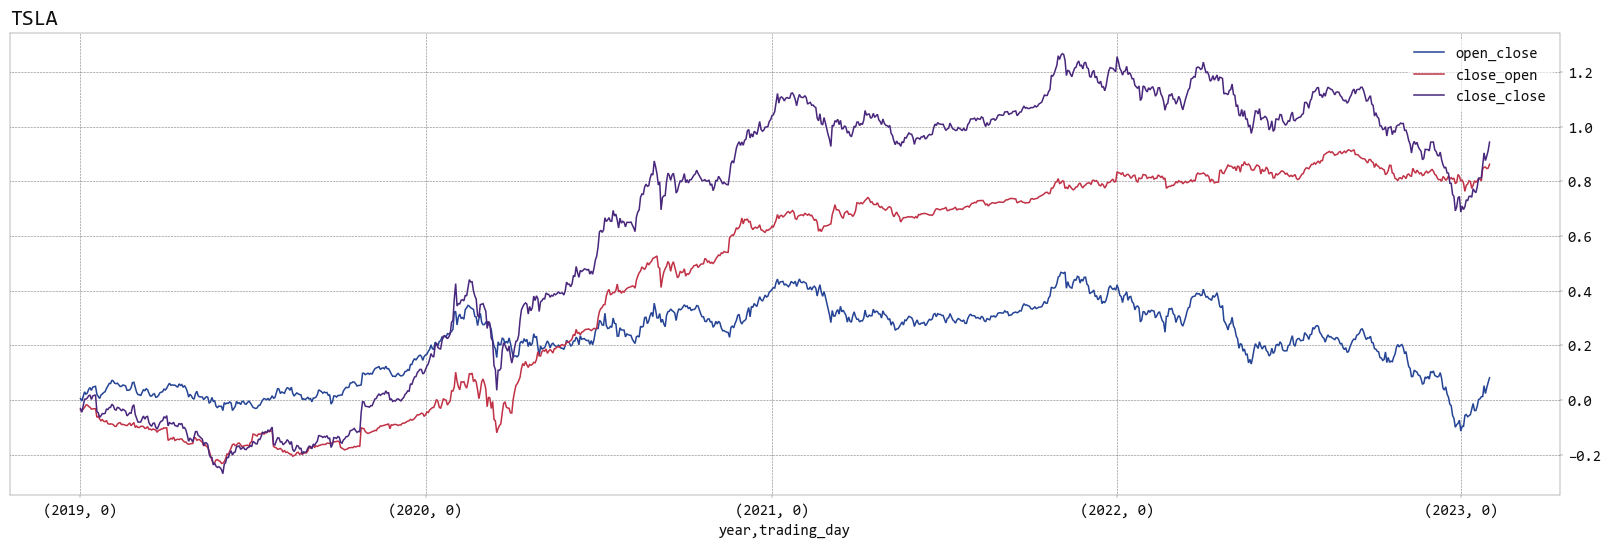

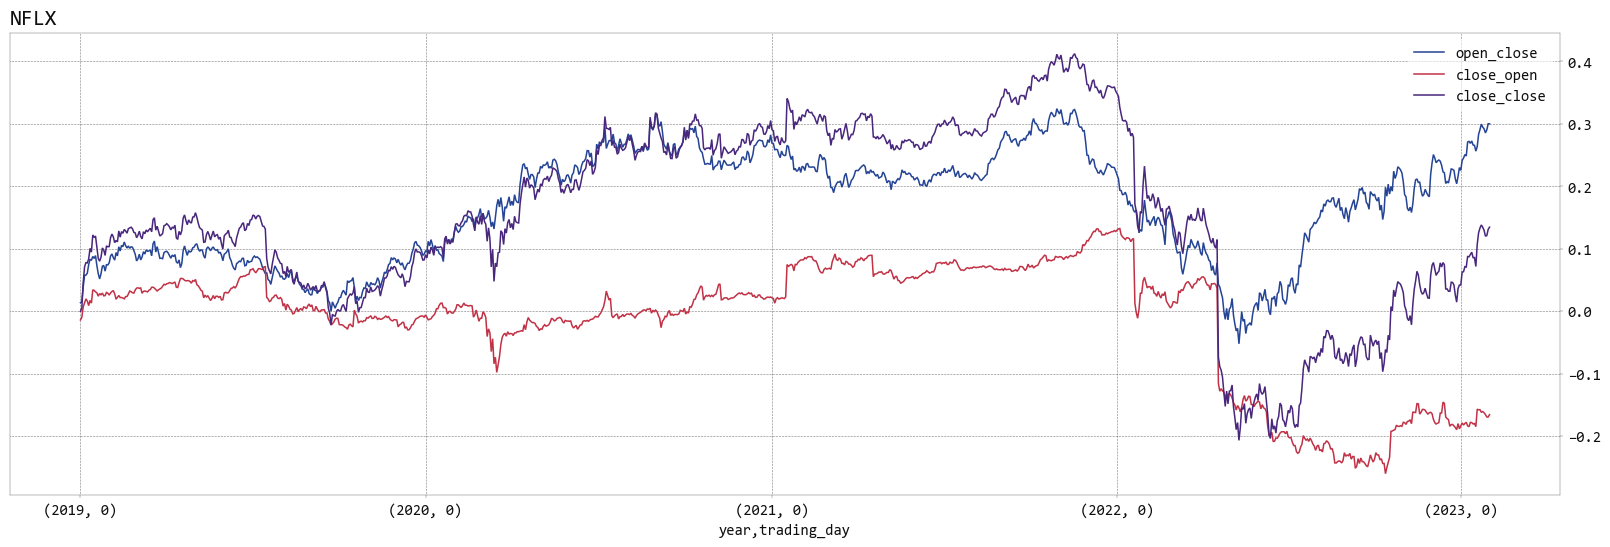

In [207]:
for tick in ticks[0:]:
    df = df_ticks[tick].copy()
    df['open_close'] = df['Close'].div(df['Open'])
    df['close_open'] = df['Open'].div(df['Close'].shift(1))
    df['close_close'] = df['Close'].div(df['Close'].shift(1))
    df['vol_ma20'] = df['Volume'].div(df['Volume'].rolling(20, min_periods=10).mean())
    #df.sort_values(by= 'close_open', ascending = False)
    df = df[df.index >= '2019']
    df['year'] = df.index.year
    df['trading_day'] = df.groupby('year').cumcount()
    df = df.reset_index().reset_index()
    df = df.set_index(['year', 'trading_day'])
    
    f, ax = plt.subplots(figsize=(20, 6))
    df[['open_close', 'close_open', 'close_close']].cumprod().apply(np.log10).plot(title = tick, ax=ax)
    #df['Close'].dropna().apply(np.log10).plot(ax=ax, alpha = 0.5)
    try:
        tickmark = [(2019, 0),(2020,0),(2021, 0),(2022, 0), (2023,0)]
        tickers = df.loc[tickmark]['index']
        ax.set_xticks(tickers)
        ax.set_xticklabels(tickmark)
    except:
        print('error')
    

Loading Daily data for NG=F with starting period 2010-01-04.

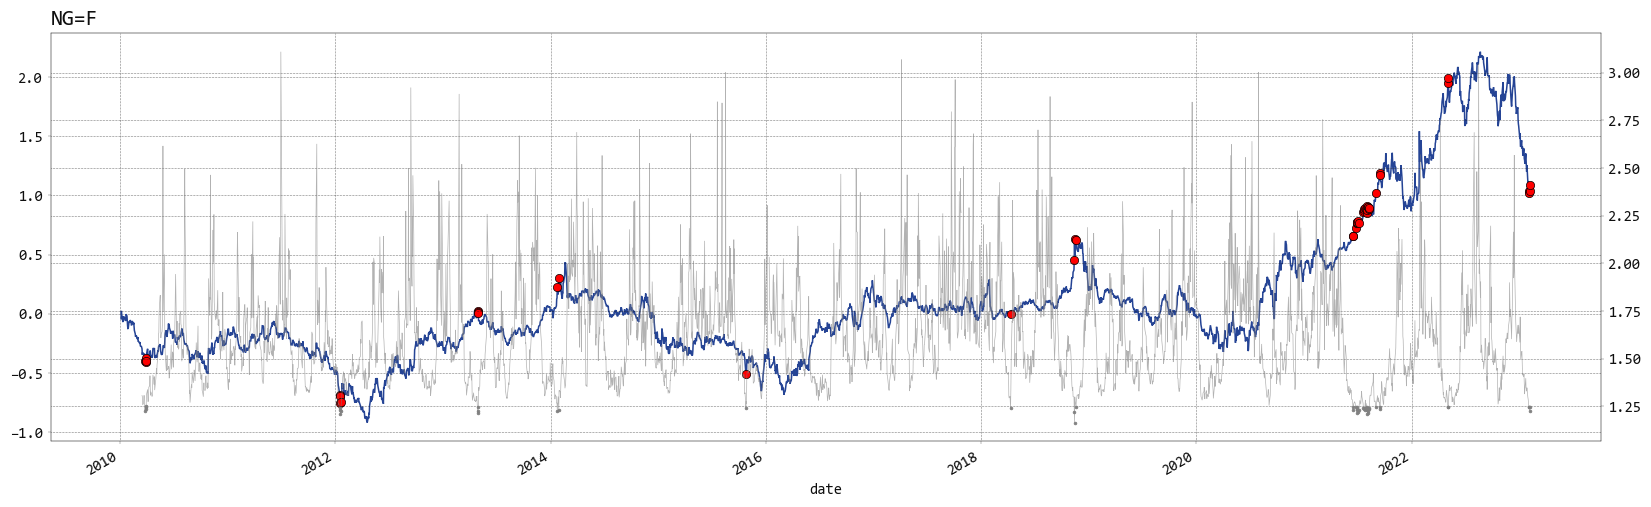

In [12]:
for tick in ['NG=F']:
    df = openbb.stocks.load(tick, start_date='2010-01-01', end_date='2024-01-01', interval=24*60)
    
    df['open_close'] = df['Close'].div(df['Open'])
    df['close_open'] = df['Open'].div(df['Close'].shift(1))
    df['close_close'] = df['Close'].div(df['Close'].shift(1)).sub(1)
    df['vol_ma20'] = df['Volume'].div(df['Volume'].rolling(12, min_periods=10).mean())
    
    df['frac'] = hurst_it(df['Close'], n=50)
    
    f, ax = plt.subplots(figsize=(20, 6))
    ax2 = ax.twinx()
    #df = df.reset_index()
    df['pct_add'] = df['close_close'].cumsum()
    df['pct_add'].plot(title = tick, ax=ax)
    df[df['frac']<1.25]['pct_add'].plot(ax=ax, ls='', marker='o', color='red', ms=6, mec='black')
    df['frac'].plot(ax = ax2, color='grey', lw=0.5, alpha = 0.6, ls='-')

    df[df['frac']<1.25]['frac'].plot(ax = ax2, color='grey', lw=1, alpha = 1, ls='', marker='o', ms=2)
    
    
    
    
    x = df.reset_index().reset_index()['index'].values
    y = df['pct_add'].values

    p = np.poly1d(np.polyfit(x, y, 1))
    df['price_pct_add_lin'] = p(x)
    
    df['price_pct_add_lin'].plot(ax = ax, color= 'r', ls='--')


<AxesSubplot: xlabel='date'>

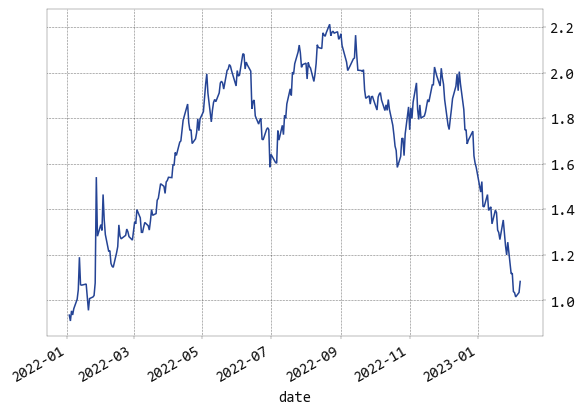

In [11]:
df.loc[df.index > '2022' ,'pct_add'].plot()

In [278]:
df_balance = pd.DataFrame(index = range(20), columns = ['init','return'])
df_balance['init'] = 6000
df_balance['return'] = 1.06
df_balance['acc_return'] = df_balance['return'].cumprod()
df_balance['acc_balance'] = df_balance['init'].mul(df_balance['acc_return'])
df_balance['rel_return'] = df_balance['return'].sub(1).mul(df_balance['acc_balance']).div(12)
df_balance

init  return  acc_return   acc_balance  rel_return
0   6000    1.06    1.060000   6360.000000   31.800000
1   6000    1.06    1.123600   6741.600000   33.708000
2   6000    1.06    1.191016   7146.096000   35.730480
3   6000    1.06    1.262477   7574.861760   37.874309
4   6000    1.06    1.338226   8029.353466   40.146767
5   6000    1.06    1.418519   8511.114674   42.555573
6   6000    1.06    1.503630   9021.781554   45.108908
7   6000    1.06    1.593848   9563.088447   47.815442
8   6000    1.06    1.689479  10136.873754   50.684369
9   6000    1.06    1.790848  10745.086179   53.725431
10  6000    1.06    1.898299  11389.791350   56.948957
11  6000    1.06    2.012196  12073.178831   60.365894
12  6000    1.06    2.132928  12797.569561   63.987848
13  6000    1.06    2.260904  13565.423735   67.827119
14  6000    1.06    2.396558  14379.349159   71.896746
15  6000    1.06    2.540352  15242.110108   76.210551
16  6000    1.06    2.692773  16156.636715   80.783184
17  6000    1.06    2.854339  17126.034917   85.630175
18  6000    1.06    3.025600  18153.597013   90.767985
19  6000    1.06    3.207135  19242.812833   96.214064